In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

from sklearn.cluster import KMeans
from scipy import stats

## Load data: 

In [2]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")

user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")

eq_user_dau = pd.read_csv("dades/eq_user_dau.csv", delimiter=',' , encoding="latin-1")
ineq_user_dau = user_dau[~user_dau.user_id.isin(eq_user_dau['user_id'])]
eq_user_dau =eq_user_dau.set_index('user_id')
ineq_user_dau =ineq_user_dau.set_index('user_id')

# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
user_street.drop(user_street[user_street['diners_inicials']== 0].index, inplace=True)
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
user_vil.drop(user_vil[user_vil['diners_inicials']== 0].index, inplace=True)
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [3]:
def contribution_round(user, userronda, norm):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = (tocontr['seleccio']/tocontr['diners_inicials'])*10
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr[norm])
    return contr_round

In [4]:
# Normalized contributions per round
## DAU
contr_dau_norm = contribution_round(user_dau,userronda_dau, 'selnorm')
contr_dau = contribution_round(user_dau,userronda_dau, 'seleccio')

## DAU eq: 
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = eq_dau.iloc[:,2:12]
eq_contr_dau = eq_contr_dau.set_index(eq_dau.user_id)
eq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]
namesList = [np.linspace(1,10,10,dtype=int)]
eq_contr_dau.columns = namesList
eq_contr_dau_norm.columns = namesList

## DAU ineq:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = ineq_dau.iloc[:,2:12]
ineq_contr_dau = ineq_contr_dau.set_index(ineq_dau.user_id)
ineq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]
ineq_contr_dau.columns = namesList
ineq_contr_dau_norm.columns = namesList

## STREET
contr_street_norm = contribution_round(user_street,userronda_street, 'selnorm')
contr_street = contribution_round(user_street,userronda_street, 'seleccio')

## VIL
contr_vil_norm = contribution_round(user_vil,userronda_vil, 'selnorm')
contr_vil = contribution_round(user_vil,userronda_vil, 'seleccio')

In [5]:
### Ronda 0: 
ronda_dau0 = pd.read_csv("dades/ronda_dau_0.csv", delimiter=',' , encoding="latin-1")
ronda_street0 = pd.read_csv("dades/ronda_street_0.csv", delimiter=',' , encoding="latin-1")
ronda_vil0 = pd.read_csv("dades/ronda_vil_0.csv", delimiter=',' , encoding="latin-1")

In [6]:
daur = pd.read_csv("dades/dau_r.csv", delimiter=',' , encoding="latin-1")
streetr = pd.read_csv("dades/street_r.csv", delimiter=',' , encoding="latin-1")
vilr = pd.read_csv("dades/vil_r.csv", delimiter=',' , encoding="latin-1")

In [7]:
def dataset_2(ds_r,user_ds):
    table1 = ds_r[['user_id','partida_id','mean_contr']]
    table2 = user_ds[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                     'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13','prfinal14','prfinal15']]
    ds_2 = table1.merge(table2, on = 'user_id')
    ds_2['genere'] =ds_2['genere'].map({'d': 1, 'h': 0})
    ds_2['prfinal1'] =ds_2['prfinal1'].map({'r1': 1, 'r2': 2, 'r3':3, 'nan':0})
    ds_2['prfinal2'] =ds_2['prfinal2'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal3'] =ds_2['prfinal3'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal4'] =ds_2['prfinal4'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal5'] =ds_2['prfinal5'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal6'] =ds_2['prfinal6'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal7'] =ds_2['prfinal7'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal8'] =ds_2['prfinal8'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal9'] =ds_2['prfinal9'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal10'] =ds_2['prfinal10'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal11'] =ds_2['prfinal11'].map({'r1': 1, 'r4': 3, 'r3':2,'nan':0})
    ds_2['prfinal12'] =ds_2['prfinal12'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal13'] =ds_2['prfinal13'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal14'] =ds_2['prfinal14'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal15'] =ds_2['prfinal15'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2.set_index('user_id', inplace=True)
    return(ds_2)

In [8]:
## Table with question results (numeric format):
ds_2_dau = dataset_2(daur,user_dau)
ds_2_street = dataset_2(streetr,user_street)

user_vil.rename(columns={'enquesta_final_pr1': 'prfinal1', 'enquesta_final_pr2': 'prfinal2','enquesta_final_pr3': 'prfinal3',
                        'enquesta_final_pr4': 'prfinal4','enquesta_final_pr5': 'prfinal5','enquesta_final_pr6': 'prfinal6',
                        'enquesta_final_pr7': 'prfinal7','enquesta_final_pr8': 'prfinal8','enquesta_final_pr9': 'prfinal9',
                        'enquesta_final_pr10': 'prfinal10','enquesta_final_pr11': 'prfinal11','enquesta_final_pr12': 'prfinal12',
                        'enquesta_final_pr13': 'prfinal13',}, inplace=True)

table1 = vilr[['user_id','partida_id','mean_contr']]
table2 = user_vil[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                 'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13']]
ds_2_vil = table1.merge(table2, on = 'user_id')
ds_2_vil['genere'] =ds_2_vil['genere'].map({'F': 1, 'M': 0})
ds_2_vil.set_index('user_id', inplace=True)

## Table with the ending round of each game:
final_dau = pd.DataFrame({'ronda_obj':ronda_dau0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_dau0['partida_id'])})

final_street = pd.DataFrame({'ronda_obj':ronda_street0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_street0['partida_id'])})

final_vil = pd.DataFrame({'ronda_obj':ronda_vil0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_vil0['partida_id'])})

## Table with total contribution of a game per round:
ronda_dau_data = pd.read_csv("dades/ronda_dau_partida.csv", delimiter=',' , encoding="latin-1")
ronda_street_data = pd.read_csv("dades/ronda_street_partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil_data = pd.read_csv("dades/ronda_vil_partida.csv", delimiter=',' , encoding="latin-1")

partides_info_dau = ronda_dau_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_street = ronda_street_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_vil = ronda_vil_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")

#ineq_contr_dau_norm.to_csv('dades/ineq_contr_dau_norm.csv', sep=',')
#eq_contr_dau_norm.to_csv('dades/eq_contr_dau_norm.csv', sep=',')
#contr_street_norm.to_csv('dades/contr_street_norm.csv', sep=',')
#contr_vil_norm.to_csv('dades/contr_vil_norm.csv', sep=',')



In [9]:
## Datasets: Heterogeneous, Homogeneous, Heterogeneous norm, Homogeneous norm
ineq_contr_dau_2= ineq_contr_dau.assign(experiment='het_dau')
contr_street_2= contr_street.assign(experiment='street')
frames_het = [ineq_contr_dau_2, contr_street_2]
heterogeneous = pd.concat(frames_het)

eq_contr_dau_2= eq_contr_dau.assign(experiment='hom_dau')
contr_vil_2= contr_vil.assign(experiment='vil')
frames_hom = [eq_contr_dau_2, contr_vil_2]
homogeneous = pd.concat(frames_hom)

ineq_contr_dau_2= ineq_contr_dau_norm.assign(experiment='het_dau')
contr_street_2= contr_street_norm.assign(experiment='street')
frames_het = [ineq_contr_dau_2, contr_street_2]
heterogeneous_norm = pd.concat(frames_het)

eq_contr_dau_2= eq_contr_dau_norm.assign(experiment='hom_dau')
contr_vil_2= contr_vil_norm.assign(experiment='vil')
frames_hom = [eq_contr_dau_2, contr_vil_2]
homogeneous_norm = pd.concat(frames_hom)

In [10]:
#Table with clustering information:
categ_het = pd.read_csv("dades/categ_het.csv", delimiter=',' , encoding="latin-1", index_col= 0)
categ_hom = pd.read_csv("dades/categ_hom.csv", delimiter=',' , encoding="latin-1", index_col= 0)
categ_hom['partida_id'] = categ_hom['partida_id'].astype(int)

In [11]:
heterogeneous['partida_id']= categ_het['partida_id'].values
homogeneous['partida_id']= categ_hom['partida_id'].values

In [12]:
def partida_table(categ_tr, experiment, treatment):
    list1 = []
    for i in categ_tr[categ_tr.experiment==experiment]['partida_id'].unique():
        list1.append(treatment[(treatment.partida_id==i) & (treatment.experiment == experiment)].mean(axis=0))

    partida0 = pd.DataFrame(list1[0][:10]).T
    for i in range(1,len(list1)):
        partida = pd.DataFrame(list1[i][:10] ).T
        partida0 = pd.concat([partida0,partida])

    namesList = [categ_tr[categ_tr.experiment==experiment].partida_id.unique()]
    partida0.index = namesList
    partida0=partida0.assign(experiment=experiment)
    return(partida0)

In [13]:
## Heterogeneous and Homogeneous partida mean contribution per group
ineq_partida_mean=partida_table(categ_het,'het_dau',heterogeneous)
street_partida_mean=partida_table(categ_het,'street',heterogeneous)
het_partida_mean = pd.concat([ineq_partida_mean,street_partida_mean])

eq_partida_mean=partida_table(categ_hom,'hom_dau',homogeneous)
vil_partida_mean=partida_table(categ_hom,'vil',homogeneous)
hom_partida_mean = pd.concat([eq_partida_mean,vil_partida_mean])

## Evolution mean contribution per group of 6: 

In [14]:
# Mean contribution per round
mean_group6_het = het_partida_mean.mean(axis=0)
mean_group6_hom = hom_partida_mean.mean(axis=0)

mean_group6_hetdau= ineq_partida_mean.mean(axis=0)
mean_group6_homdau = eq_partida_mean.mean(axis=0)
mean_group6_street = street_partida_mean.mean(axis=0)
mean_group6_vil= vil_partida_mean.mean(axis=0)

In [15]:
## Standard error of each dataset
#Treatment level
se_het = stats.sem(het_partida_mean.iloc[:,:10])
se_hom = stats.sem(hom_partida_mean.iloc[:,:10])

#Experiment level
se_ineq = stats.sem(ineq_partida_mean.iloc[:,:10])
se_eq = stats.sem(eq_partida_mean.iloc[:,:10])
se_street = stats.sem(street_partida_mean.iloc[:,:10])
se_vil = stats.sem(vil_partida_mean.iloc[:,:10])

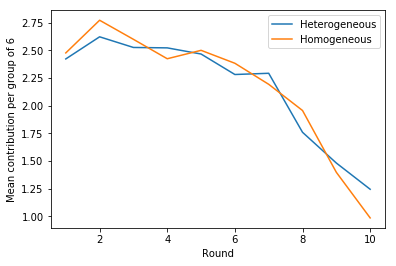

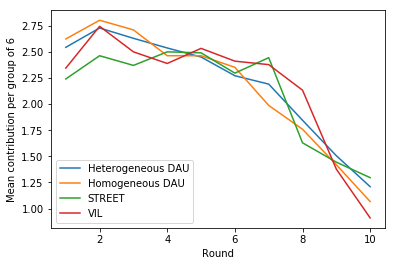

In [16]:
#Plot
fig = plt.figure()
ax = plt.axes()

x = np.linspace(1, 10, 10)
ax.plot(x, mean_group6_het,label="Heterogeneous")
ax.plot(x, mean_group6_hom,label="Homogeneous")

plt.xlabel('Round')
plt.ylabel('Mean contribution per group of 6')
plt.legend()
plt.show()

fig = plt.figure()
ax = plt.axes()

x = np.linspace(1, 10, 10)
ax.plot(x, mean_group6_hetdau,label="Heterogeneous DAU")
ax.plot(x, mean_group6_homdau,label="Homogeneous DAU")
ax.plot(x, mean_group6_street,label="STREET")
ax.plot(x, mean_group6_vil,label="VIL")

plt.xlabel('Round')
plt.ylabel('Mean contribution per group of 6')
plt.legend()
plt.show()

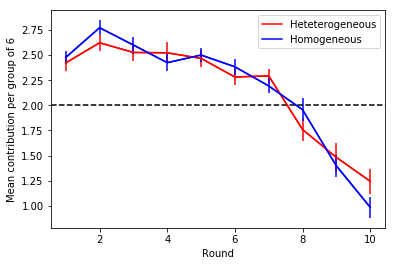

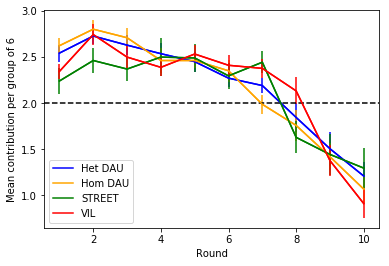

In [24]:
## Plot:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, mean_group6_het,label="Heteterogeneous", c = "red")
ax.errorbar(x, mean_group6_het, yerr=se_het , c = 'red')
ax.plot(x, mean_group6_hom,label="Homogeneous", c = 'blue')
ax.errorbar(x, mean_group6_hom, yerr=se_hom , c = 'blue')
ax.axhline(y=2, color='black', linestyle='--')
plt.xlabel('Round')
plt.ylabel('Mean contribution per group of 6')
plt.legend()
plt.show()


## Plot:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, mean_group6_hetdau,label="Het DAU", c = "blue")
ax.errorbar(x, mean_group6_hetdau, yerr=se_ineq , c = 'blue')
ax.plot(x, mean_group6_homdau,label="Hom DAU", c = 'orange')
ax.errorbar(x, mean_group6_homdau, yerr=se_eq , c = 'orange')
ax.plot(x, mean_group6_street,label="STREET", c = 'green')
ax.errorbar(x, mean_group6_street, yerr=se_street, c = 'green' )
ax.plot(x, mean_group6_vil,label="VIL", c = 'red')
ax.errorbar(x, mean_group6_vil, yerr=se_vil, c = 'red' )
ax.axhline(y=2, color='black', linestyle='--')

plt.xlabel('Round')
plt.ylabel('Mean contribution per group of 6')
plt.legend(loc=3)
plt.show()

### Analysis of the games according their ending:
In this section I use a function to generate line plots with the mean contribution of each game ending at certain round. 

In [53]:
def ending_game(final_ds,contr_ds,user_ds,ending_pos,name_ds):
    final = final_ds[final_ds.ronda_obj==ending_pos]
    mean_contr_ds= contr_ds.mean(axis=0)
    #Plot
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(1, 10, 10)
    list_contr=[]
    for i in final.partida_id.unique():
        game_contr = contr_ds.loc[list(user_ds[user_ds.partida_id==i].index),:]
        mean_contr_game = game_contr.describe().loc['mean',:]
        ax.plot(x, mean_contr_game, label=["Game:",i])
        list_contr.append([i,game_contr])

    ax.plot(x, mean_contr_ds,label=name_ds,c = 'black')
    plt.xlabel('rounds')
    plt.ylabel('Mean Contribution')
    ax.axvline(x=ending_pos, c = "black")
    plt.legend()
    return(list_contr)

In [65]:
def game_anal(contr_ds,contr_ds_n,user_ds,game_num,end_ronda):
    print('Users Information:')
    print(user_ds[user_ds.partida_id==game_num])
    print('\n')
    print('Contribution Table:')
    contr_game = contr_ds.loc[user_ds[user_ds.partida_id==game_num]['user_id'],:]
    contr_game_n = contr_ds_n.loc[user_ds[user_ds.partida_id==game_num]['user_id'],:]
    #print(contr_game)
    print('\n')
    print('Sum of Normalized Contribution:')
    print(contr_game_n.sum(axis=1))
    print('\n')
    print('Evolution Contributions:')
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(1, 10, 10)
    ax.plot(x, contr_game[contr_game == 0].count(),label="0")
    ax.plot(x, contr_game[contr_game == 2].count(),label="2")
    ax.plot(x, contr_game[contr_game == 4].count(),label="4")

    plt.xlabel('Round')
    plt.ylabel('Users')
    ax.axvline(x=end_ronda, c = "black")
    plt.legend()

In [66]:
def without_end (contr_end_round, end_round, n_partida_id):
    f_end = contr_end_round[n_partida_id][1].iloc[:,::-1].iloc[:,(10-end_round):]
    #f_end=f_end[f_end.columns[::-1]]
    
    f_end.columns = list(range(1,end_round+1))
    x = np.linspace(1, end_round, end_round)
    fig = plt.figure()
    ax = plt.axes()
    for i in f_end.index:
        
        #color = 'r' if (group['label'] < 0).all() else 'g'
        ax.plot(x, np.cumsum(f_end[f_end.index == i].values), label=["User:",i])
        plt.xlabel('Final Round - Round')
        plt.ylabel('Accum rev contribution')
        plt.legend()
    return(f_end)

In [56]:
def final_table(final_ds, contr_ds, user_ds, name_ds):
    list1=[]
    for j in [7,8,9,10]:
        end= ending_game(final_ds, contr_ds, user_ds, j,name_ds)
        for i in range(len(end)):
            contr_g = end[i][1].iloc[:,(10-j):]
            list1.append(contr_g)
    frames = [i for i in list1]
    table = pd.concat(frames)
    return(table)

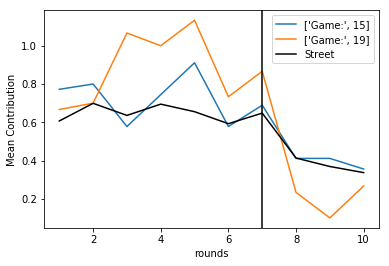

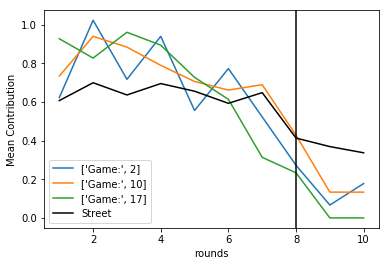

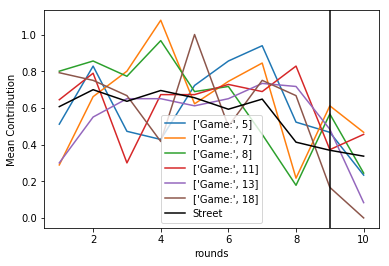

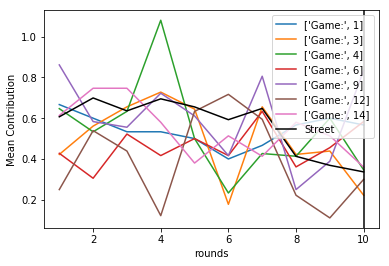

In [57]:
table_street = final_table(final_street,contr_street_norm, user_street, 'Street')

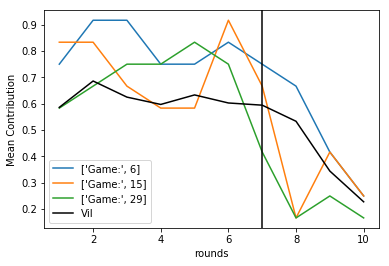

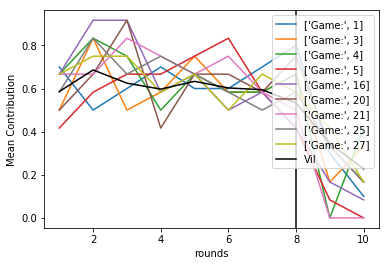

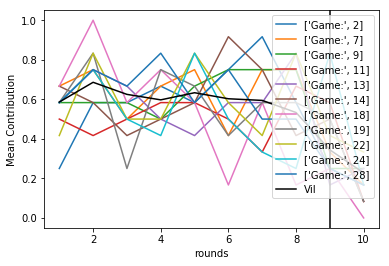

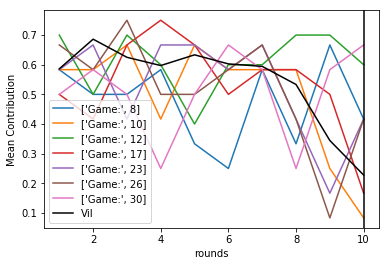

In [58]:
table_vil = final_table(final_vil,contr_vil_norm, user_vil, 'Vil')

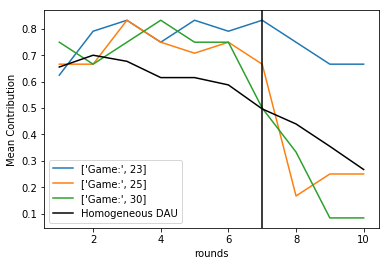

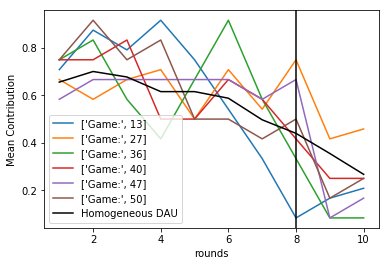

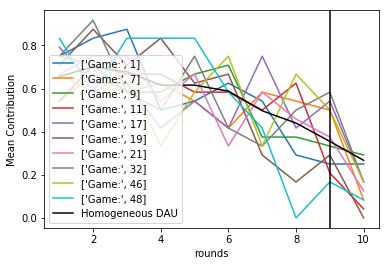

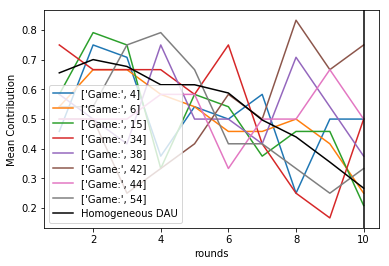

In [59]:
table_eq_dau = final_table(final_dau[final_dau.index.isin(eq_user_dau.partida_id.unique())],eq_contr_dau_norm, eq_user_dau, 'Homogeneous DAU')

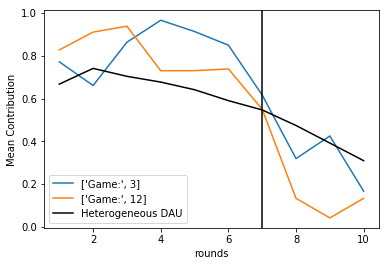

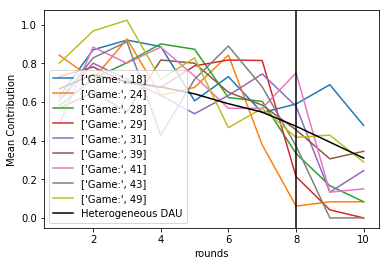

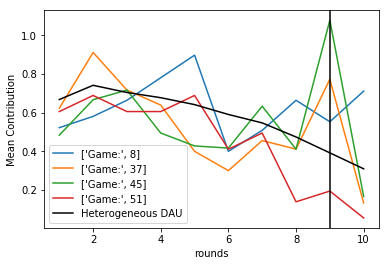

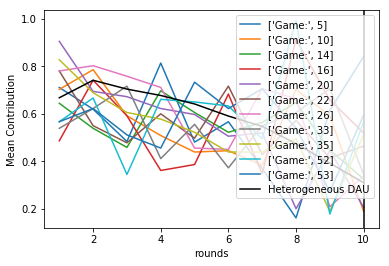

In [60]:
table_ineq_dau = final_table(final_dau[final_dau.index.isin(ineq_user_dau.partida_id)],ineq_contr_dau_norm, ineq_user_dau, 'Heterogeneous DAU')

In [ ]:
table_het = pd.concat([table_ineq_dau, table_street])
table_hom = pd.concat([table_eq_dau, table_vil])

### Line plots with the reverse accumulated contribution: 

In [146]:
def accum_rev(final_ds,contr_ds,user_ds,name_ds):
    for j in [7,8,9,10]:
        end = ending_game(final_ds, contr_ds, user_ds, j,"Street")
        for i in range(len(end)):
            without_end(end, j,i)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


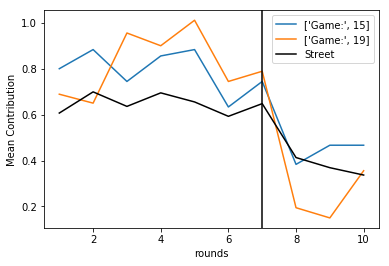

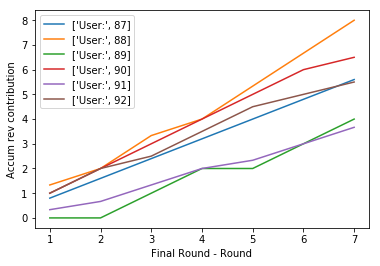

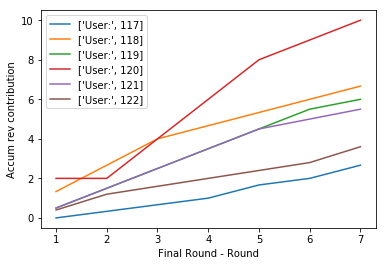

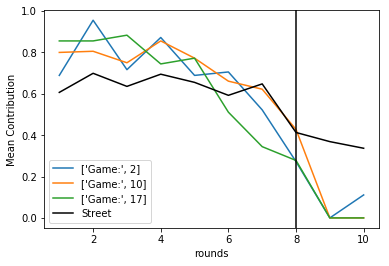

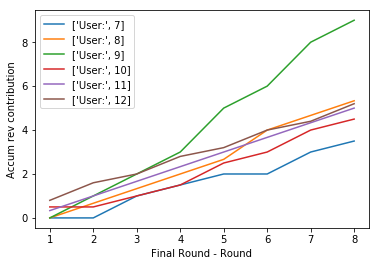

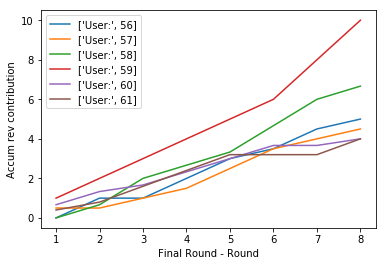

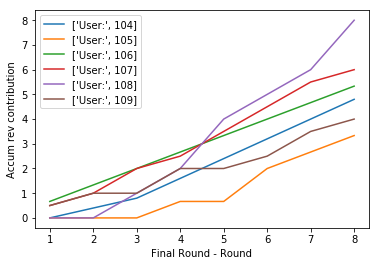

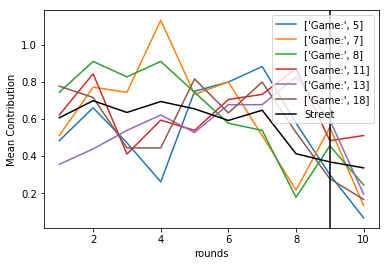

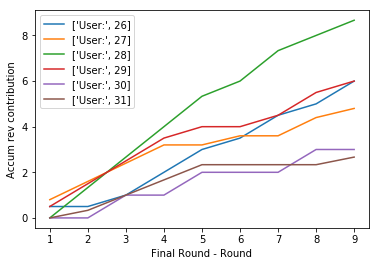

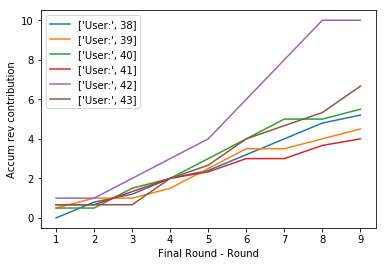

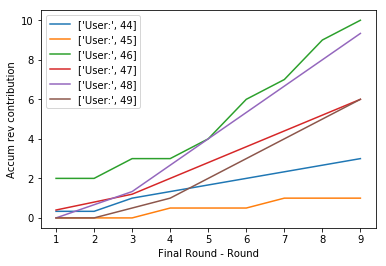

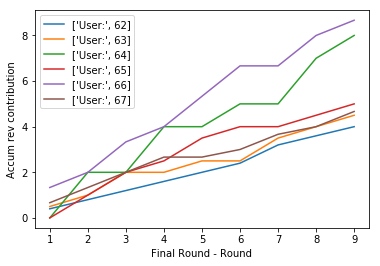

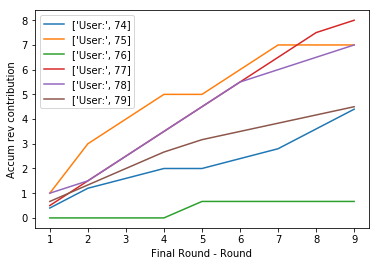

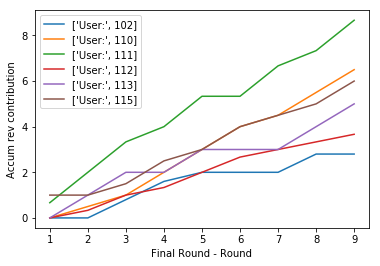

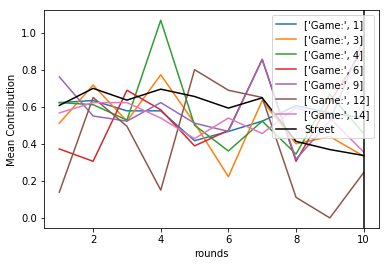

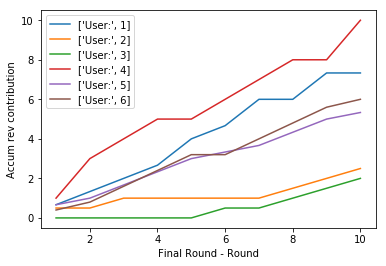

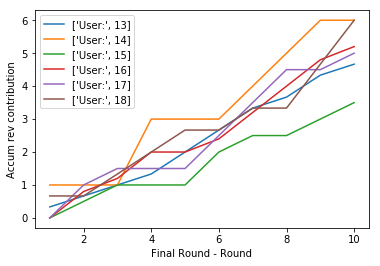

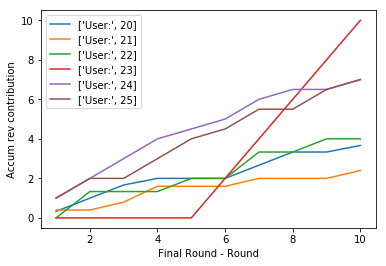

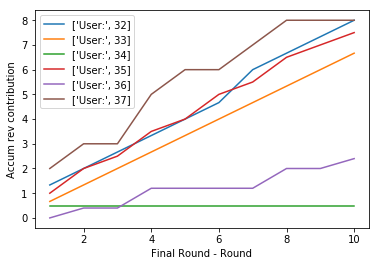

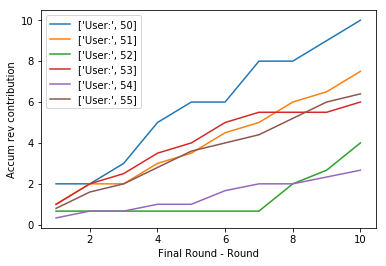

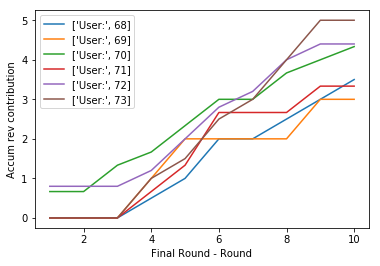

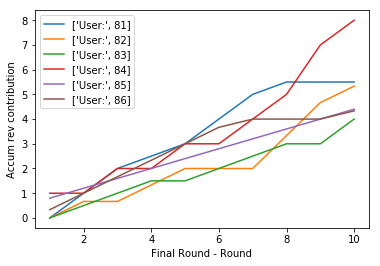

In [147]:
accum_rev(final_street,contr_street_norm,user_street,'Street')

## Questionaire analysis: 

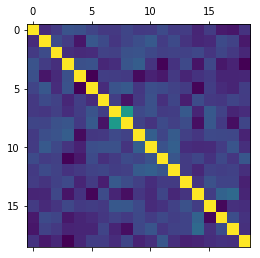

In [199]:
plt.matshow(ds_2_dau.corr())

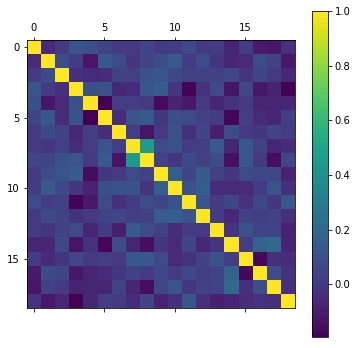

In [203]:
fig, ax = plt.subplots(figsize=(6, 6), ncols=1)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax.matshow(ds_2_dau.corr())

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

# repeat everything above for the negative data
#neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
#fig.colorbar(neg, ax=ax2)

plt.show()

In [228]:
ineq_user_dau.head()

,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,prfinal4,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
user_id,,,,,,,,,,,,,,,,,,,,,
5,Peripam,8440,h,24,r6,NaN,r1,r2,r2,r3,...,False,False,2,0,6,r3,r4,10,10,1
9,Lau,8739,d,25,r4,NaN,r1,r2,r1,r2,...,False,False,2,0,3,r2,r3,0,10,1
10,Sea,8027,d,15,r2,NaN,r1,r1,r2,r3,...,False,False,2,0,4,r4,r3,10,10,1
11,Ãfrica,8016,d,16,r3,NaN,r1,r2,r2,r3,...,False,False,2,0,2,r2,r2,2,10,1
12,Sara,8760,d,25,r6,NaN,r1,r1,r1,r2,...,False,True,2,0,5,r1,r3,25,10,1


#### Answer to question 4 & 5:
+ Q4: Generally, if others are contributing little, I should also contribute little.
+ Q5: Generally, if others are contributing a lot, I should also contribute a lot.

#### heterogeneous

#### Q4:

In [235]:
ineq_user_dau['prfinal4'].value_counts()

r3    95
r2    51
r1    11
r4     5
Name: prfinal4, dtype: int64

In [232]:
user_street['prfinal4'].value_counts()

r3    55
r2    31
r1    11
r4     3
Name: prfinal4, dtype: int64

In [251]:
## Resposta r4: La meva aportació no hauria de dependre d'això
(95+55)/(162+108)

0.5555555555555556

#### Q5:

In [247]:
ineq_user_dau['prfinal5'].value_counts()

r3    106
r2     35
r1     16
r4      5
Name: prfinal5, dtype: int64

In [248]:
user_street['prfinal5'].value_counts()

r3    53
r2    21
r1    19
r4     7
Name: prfinal5, dtype: int64

In [249]:
## Resposta r5: La meva aportació no hauria de dependre d'això
(106+53)/(162+108)

0.5888888888888889

In [241]:
het_q4 = pd.concat([ineq_user_dau['prfinal4'],user_street['prfinal4']])
het_q5 = pd.concat([ineq_user_dau['prfinal5'],user_street['prfinal5']])

#### homogeneous

In [233]:
eq_user_dau['prfinal4'].value_counts()

r3    80
r2    59
r1    13
r4     8
Name: prfinal4, dtype: int64

In [237]:
80/180

0.4444444444444444

In [242]:
hom_q4 = eq_user_dau['prfinal4']
hom_q5 = eq_user_dau['prfinal5']

#### GLM test for independence between both treatments:

In [255]:
categ_het.head()

,diners_inicials,partida_id,contr_total,mean_contr,contr/budget,category,category4,clust_coef,experiment
user_id,,,,,,,,,
5,30,2,20,2.0,0.666667,2,2,2,het_dau
9,20,2,20,2.0,1.000000,2,3,0,het_dau
10,40,2,30,3.0,0.750000,2,3,2,het_dau
11,40,2,38,3.8,0.950000,2,3,2,het_dau
12,60,2,35,3.5,0.583333,1,2,1,het_dau


In [264]:
pd.concat([ineq_user_dau['bin_ed'],user_street['bin_ed']]).values

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [267]:
## Dependent variable: Is universitarian or not, success or not. 
#categ_het['elderly'] = np.where(df['age']>=50, 'yes', 'no')
#Heterogeneous:
user_street['bin_ed'] = np.where(user_street['nivell_estudis'] == 'r6',1,0)
ineq_user_dau['bin_ed']=np.where(ineq_user_dau['nivell_estudis'] == 'r6',1,0)

categ_het['bin_ed']=pd.concat([ineq_user_dau['bin_ed'],user_street['bin_ed']]).values

#Homogeneous:
eq_user_dau['bin_ed']=np.where(eq_user_dau['nivell_estudis'] == 'r6',1,0)
user_vil['bin_ed'] = np.where(user_vil['nivell_estudis'] == 'r6',1,0)

categ_hom['bin_ed']=pd.concat([eq_user_dau['bin_ed'],user_vil['bin_ed']]).values

categ_het.to_csv('dades/categ_het.csv' ,sep=',', index=True)
categ_hom.to_csv('dades/categ_hom.csv' ,sep=',', index=True)
## This dataset is used in R to aply the 

In [258]:
user_street.head()

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig,bin
0,1,Test5,9000,d,56,r1,NaN,r1,r4,r3,...,False,1,0,3,r1,r4,8,10,0,0
1,2,Test2,12345,d,16,r2,NaN,r1,r3,r4,...,False,1,0,6,r3,r1,30,10,0,0
2,3,Test1,12345,h,12,r1,NaN,r1,r3,r1,...,False,1,0,4,r4,r3,32,10,1,0
3,4,Test3,12345,h,14,r1,NaN,r1,r1,r1,...,False,1,0,1,r3,r4,0,10,0,0
4,5,Test4,9000,h,55,r1,NaN,r1,r1,r1,...,False,1,0,5,r4,r3,28,10,0,0


## Clustering Analysis: Methods to identify optimal K

In [24]:
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [35]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
    

In [33]:
X = table_street
labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)
k, gapdf = optimalK(X_hat, nrefs=5, maxClusters=15)
print ('Optimal k is: ', k)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  14


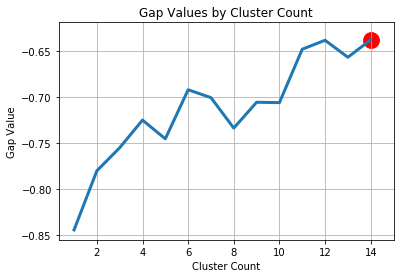

In [34]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [58]:
from sklearn.datasets.samples_generator import make_blobs
from gap_statistic import OptimalK
X = table_street
labels, centroids, X_hat = kmeans_missing(X, 5, max_iter=10)
optimalK = OptimalK(parallel_backend='pandas')
optimalK(X_hat, cluster_array=[1,2,3,4,5])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


3

In [59]:
X_hat.shape

(108, 10)

In [61]:
X_hat[0,:]

array([ 0.5406019 ,  0.61516718,  0.57703111,  0.8       ,  0.8       ,
        0.8       ,  0.8       ,  0.8       ,  0.8       ,  0.8       ])

### Elbow method to find the optimal number of clusters: 

In [43]:
def elbow(X):
    labels, centroids, X_hat = kmeans_missing(X, 3, max_iter=10)
    k, gapdf = optimalK(X_hat, nrefs=5, maxClusters=15)
    print ('Optimal k is: ', k)

    cluster_range = range( 1, 20)
    cluster_errors = []

    for num_clusters in cluster_range:
        clusters = KMeans( num_clusters )
        clusters.fit( X_hat )
        cluster_errors.append( clusters.inertia_ )

    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

    clusters_df[0:10]

    plt.figure(figsize=(12,6))
    plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  14


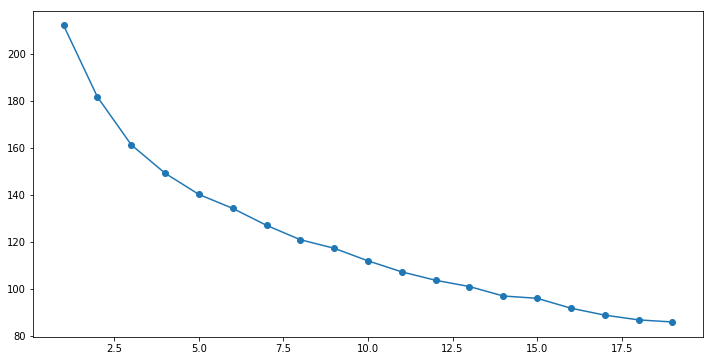

In [44]:
elbow(table_vil)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  14


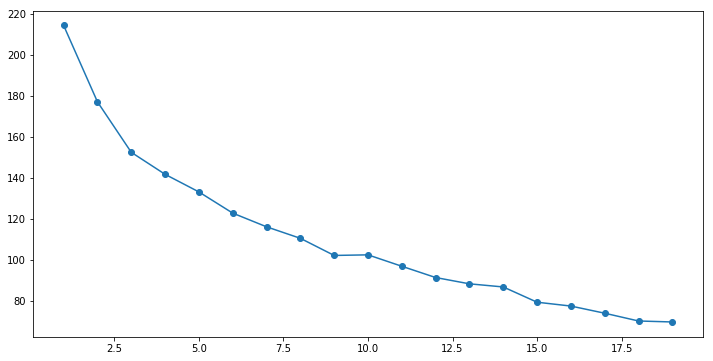

In [45]:
elbow(table_street)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  11


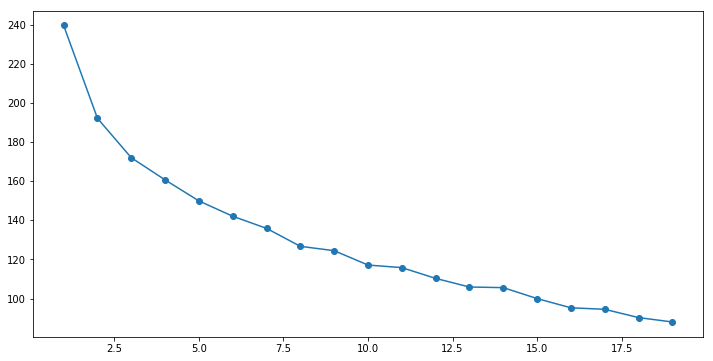

In [46]:
elbow(table_ineq_dau)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Optimal k is:  13


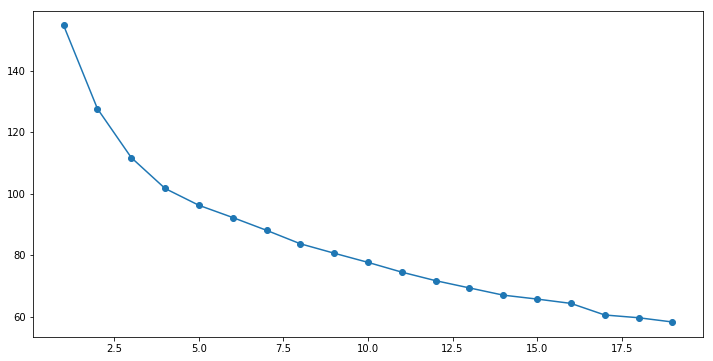

In [47]:
elbow(table_eq_dau)

## Exploratory analysis: evolution of the game and ending effects
#### Histogram with the count of the ending games

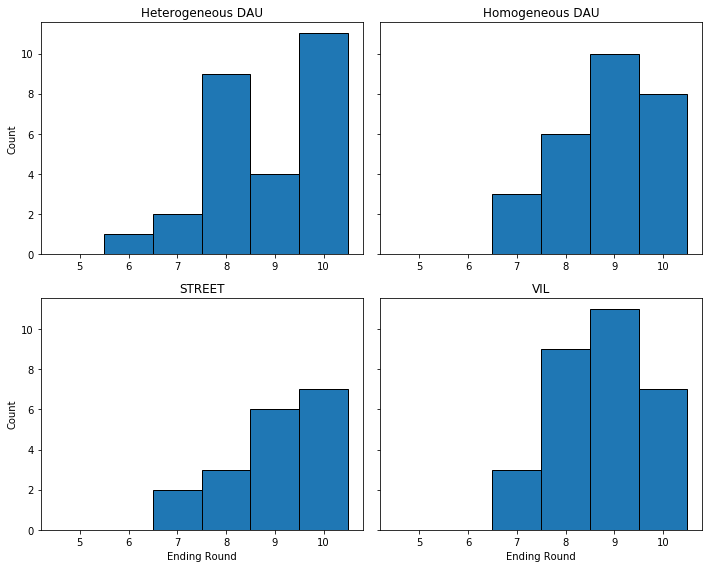

Mean ending round:
Heterogeneous DAU: 8.814814814814815
Homogeneous DAU: 8.851851851851851
STREET: 9.0
VIL 8.733333333333333
SE ending round:
Heterogeneous DAU: 0.226688265921
Homogeneous DAU: 0.190244285183
STREET: 0.242535625036
VIL 0.172429118093


In [58]:
#Plot of Anscombe's quartet

bins=np.arange(5,12,1)
fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

axs[0,0].hist(final_dau.loc[final_dau.index.isin(ineq_user_dau.partida_id),'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[0,0].set_xticks(bins[:-1])
#axs[0,0].set_xlabel('Ending Round')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Heterogeneous DAU')

axs[0,1].hist(final_dau.loc[final_dau.index.isin(eq_user_dau.partida_id),'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[0,1].set_xticks(bins[:-1])
#axs[0,1].set_xlabel('Ending Round')
#axs[0,1].set_ylabel('Count')
axs[0,1].set_title('Homogeneous DAU')

axs[1,0].hist(final_street.loc[:,'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[1,0].set_xticks(bins[:-1])
axs[1,0].set_xlabel('Ending Round')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('STREET')

axs[1,1].hist(final_vil.loc[:,'ronda_obj'], bins=bins, align='left', histtype='bar', ec='black')
axs[1,1].set_xticks(bins[:-1])
axs[1,1].set_xlabel('Ending Round')
#axs[1,1].set_ylabel('Count')
axs[1,1].set_title('VIL')

fig.tight_layout()    
    
    
plt.show()

print('Mean ending round:')
print("Heterogeneous DAU:",np.mean(final_dau.loc[final_dau.index.isin(ineq_user_dau.partida_id),'ronda_obj']))
print("Homogeneous DAU:",np.mean(final_dau.loc[final_dau.index.isin(eq_user_dau.partida_id),'ronda_obj']))
print("STREET:",np.mean(final_street.loc[:,'ronda_obj']))
print("VIL",np.mean(final_vil.loc[:,'ronda_obj']))

print('SE ending round:')
print("Heterogeneous DAU:",stats.sem(final_dau.loc[final_dau.index.isin(ineq_user_dau.partida_id),'ronda_obj']))
print("Homogeneous DAU:",stats.sem(final_dau.loc[final_dau.index.isin(eq_user_dau.partida_id),'ronda_obj']))
print("STREET:",stats.sem(final_street.loc[:,'ronda_obj']))
print("VIL",stats.sem(final_vil.loc[:,'ronda_obj']))


### What happens to the first three rounds, from three to six, and from six to the end?
### Also can be done by 5 and 5:

Distributions of normalized contributions in the three phases of the game. The mean (SD) in each phase, based on
the accumulated capital in the common fund, is: common fund from 0 to 30 e: 0.67 (0.33), common fund from 31 to 96 e:
0.62 (0.37), and common fund from 97 to 120 e: 0.39 (0.38).

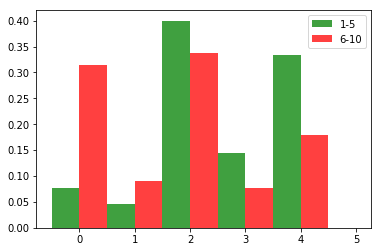

In [149]:
table1 = eq_contr_dau.iloc[:,:5]
table2 = eq_contr_dau.iloc[:,5:]

first = table1.values.flatten()
final = table2.values.flatten()

ax = plt.subplot(111)
ax.hist(first, bins=np.arange(6) - 0.50, normed=1, facecolor='green', alpha=0.75, width=0.5, label='1-5')
ax.hist(final, bins=np.arange(6) , normed=1, facecolor='red', alpha=0.75, width=0.5, label='6-10')
#ax.hist(np.mean(dos), normed=1, facecolor='red', alpha=0.75)
#ax.hist(np.mean(cuatro), normed=1, facecolor='blue', alpha=0.75)
#ax.bar(np.array([0,2,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
plt.legend()
plt.show()

In [150]:
def split_contr(contr_ds,name_ds):
    table1 = contr_ds.loc[:,:5]
    table2 = contr_ds.loc[:,5:]
    d = {'0': [table1[table1 == 0].count().sum(), table2[table2 == 0].count().sum()], 
     '2': [table1[table1 == 2].count().sum(), table2[table2 == 2].count().sum()], 
     '4': [table1[table1 == 4].count().sum(), table2[table2 == 4].count().sum()]}
    df = pd.DataFrame(data=d, index = ['1-5','6-10'])
    #ax = plt.subplot(111)
    #ax.bar(np.array([0,2,4])-0.2, df.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
    #ax.bar(np.array([0,2,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
    #ax.set_xlabel('Investment Selection')
    #ax.set_ylabel('Count')
    #ax.set_title(name_ds)
    #plt.legend()
    #plt.show()
    return(table1,table2,df)

In [151]:
def split_contr_dau(contr_ds,name_ds):
    table1 = contr_ds.iloc[:,:5]
    table2 = contr_ds.iloc[:,5:]
    d = {'0': [table1[table1 == 0].count().sum(), table2[table2 == 0].count().sum()], 
     '1': [table1[table1 == 1].count().sum(), table2[table2 == 1].count().sum()], 
     '2': [table1[table1 == 2].count().sum(), table2[table2 == 2].count().sum()], 
     '3': [table1[table1 == 3].count().sum(), table2[table2 == 3].count().sum()],
     '4': [table1[table1 == 4].count().sum(), table2[table2 == 4].count().sum()]}
    df = pd.DataFrame(data=d, index = ['1-5','6-10'])
    #ax = plt.subplot(111)
    #ax.bar(np.array([0,1,2,3,4])-0.2, df.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
    #ax.bar(np.array([0,1,2,3,4])+0.2, df.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
    #ax.set_xlabel('Investment Selection')
    #ax.set_ylabel('Count')
    #ax.set_title(name_ds)
    #plt.legend()
    #plt.show()
    return(table1,table2,df)

In [152]:
t1_he, t2_he, df_he = split_contr_dau(ineq_contr_dau, 'Heterogeneous DAU')
t1_ho, t2_ho, df_ho = split_contr_dau(eq_contr_dau, 'Homogeneous DAU')
t1_s, t2_s, df_s = split_contr(contr_street, 'STREET')
t1_v, t2_v,df_v = split_contr(contr_vil, 'VIL')

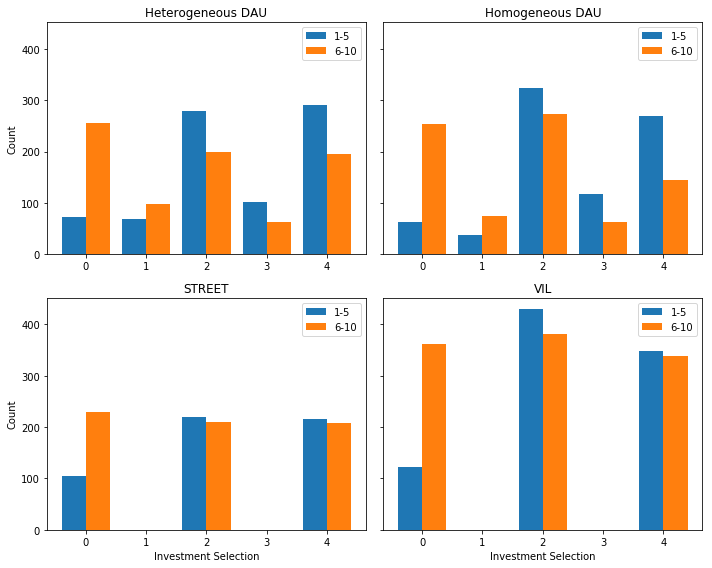

In [153]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

axs[0,0].bar(np.array([0,1,2,3,4])-0.2, df_he.loc['1-5',:].values,align='center',width = 0.4, label='1-5') 
axs[0,0].bar(np.array([0,1,2,3,4])+0.2, df_he.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Heterogeneous DAU')
axs[0,0].legend()

axs[0,1].bar(np.array([0,1,2,3,4])-0.2, df_ho.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
axs[0,1].bar(np.array([0,1,2,3,4])+0.2, df_ho.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[0,1].set_title('Homogeneous DAU')
axs[0,1].legend()

axs[1,0].bar(np.array([0,2,4])-0.2, df_s.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
axs[1,0].bar(np.array([0,2,4])+0.2, df_s.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[1,0].set_xlabel('Investment Selection')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('STREET')
axs[1,0].legend()

axs[1,1].bar(np.array([0,2,4])-0.2, df_v.loc['1-5',:].values,align='center',width = 0.4, label='1-5')
axs[1,1].bar(np.array([0,2,4])+0.2, df_v.loc['6-10',:].values,align='center', width= 0.4, label='6-10')
axs[1,1].set_xlabel('Investment Selection')
axs[1,1].set_title('VIL')
axs[1,1].legend()

fig.tight_layout()    
    
plt.show()

## Exploratory Analysis
### Determine categories:

In [154]:
from matplotlib.ticker import MaxNLocator

In [155]:
def label_saving (row,category):
    if row[category] < 0.33 :
        return 0
    if row[category] >= 0.33 and row[category] <= 0.66 :
        return 1
    else:
        return 2

In [156]:
def label_saving_4 (row,category):
    if row[category] < 0.250 :
        return 0
    if row[category] >= 0.250 and row[category] < 0.500:
        return 1
    if row[category] >= 0.500 and row[category] < 0.750 :
        return 2
    else:
        return 3

In [157]:
def label_saving_5 (row,category):
    if row[category] < 0.200 :
        return 0
    if row[category] >= 0.200 and row[category] < 0.400:
        return 1
    if row[category] >= 0.400 and row[category] <= 0.600 :
        return 2
    if row[category] > 0.600 and row[category] <= 0.800 :
        return 3
    else:
        return 4

In [158]:
def categories (contr_ds,user_ds,category):
    category_ds = user_ds.loc[:,["user_id","diners_inicials",'partida_id']]
    category_ds.set_index('user_id', inplace=True)
    #category_ds= category_ds.reindex(category_ds.loc[:,'user_id'])
    category_ds['contr_total']=contr_ds.sum(axis=1)
    category_ds['contr/budget']= (category_ds.contr_total)/ category_ds.diners_inicials
    category_ds['category']=category_ds.apply (lambda row: label_saving (row,'contr/budget'),axis=1)
    category_ds['category4']=category_ds.apply (lambda row: label_saving_4 (row,'contr/budget'),axis=1)
    category_ds['category5']=category_ds.apply (lambda row: label_saving_5 (row,'contr/budget'),axis=1)
    #category_ds['partida_id'] = user_street.partida_id
    categories_per_group = []

    for i in np.unique(category_ds.partida_id):
        x = category_ds[category_ds.partida_id==i][category].value_counts()
        categories_per_group.append(x)
        fig = plt.figure()
        ax = plt.axes()
        ax.bar(x.keys(),x,align='center',width = 0.4)
        ax.set_xlabel('User Category')
        ax.set_ylabel('Count')
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_xlim((-0.5,2.5))
        name = 'Game:',int(i)
        ax.set_title(name)  
    return category_ds

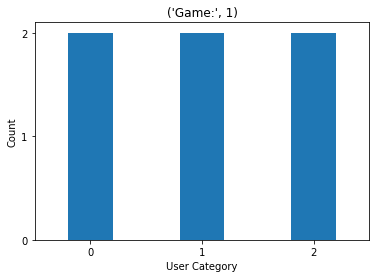

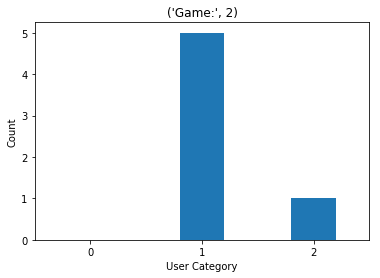

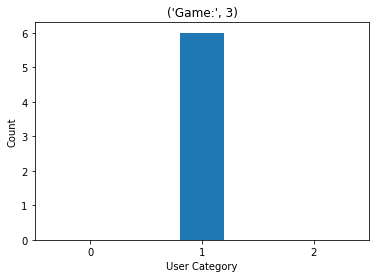

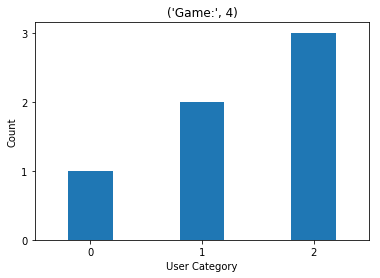

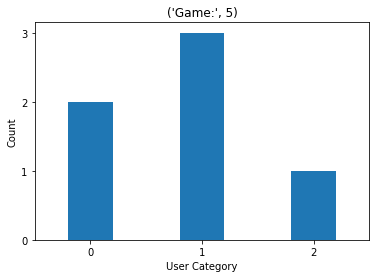

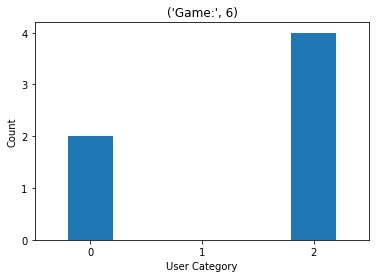

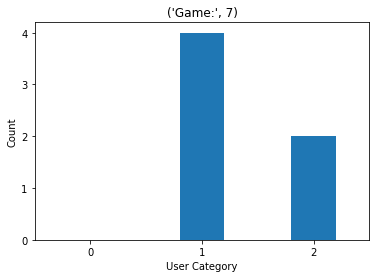

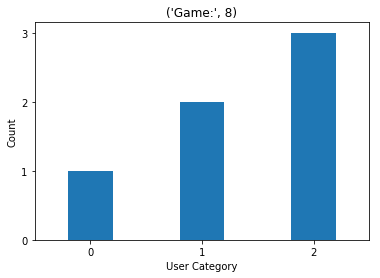

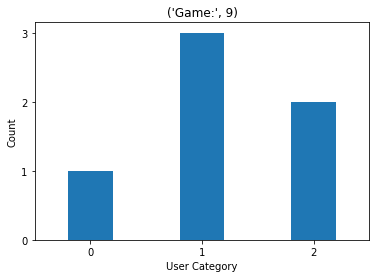

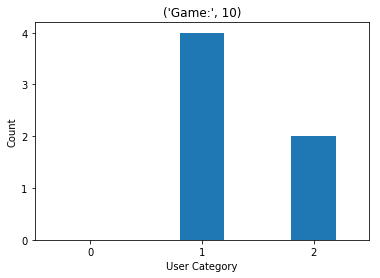

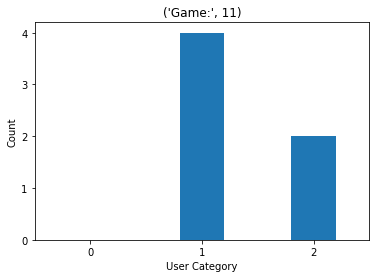

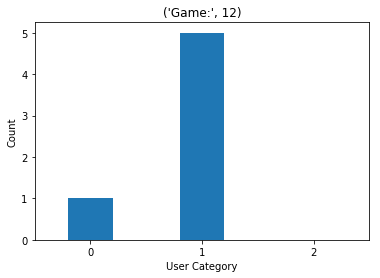

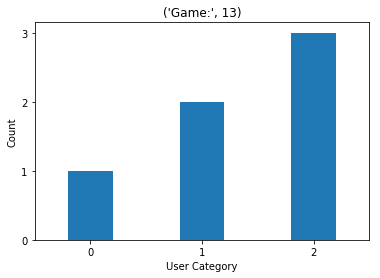

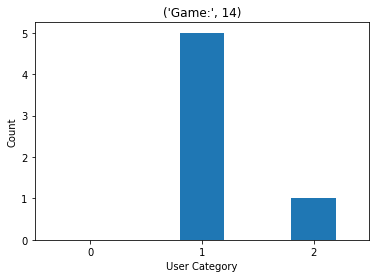

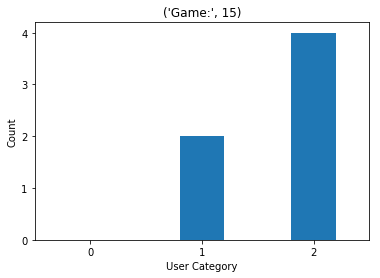

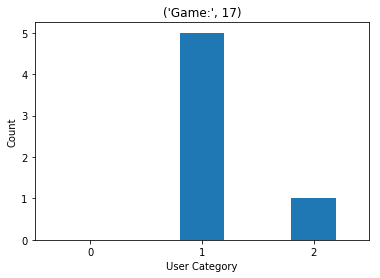

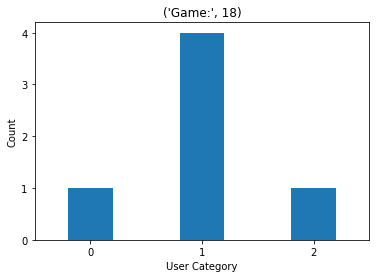

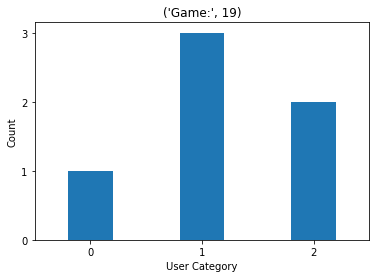

In [159]:
category_street = categories(contr_street,user_street, 'category')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


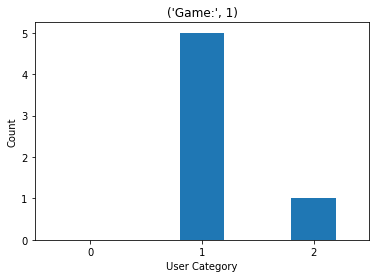

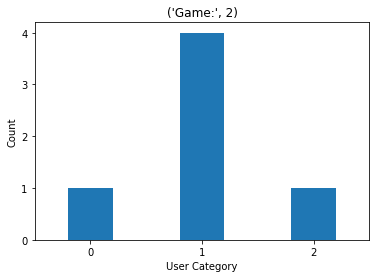

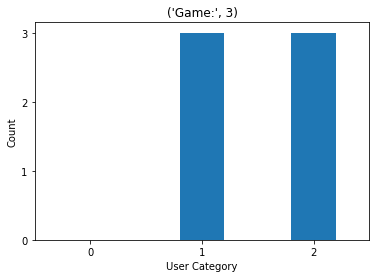

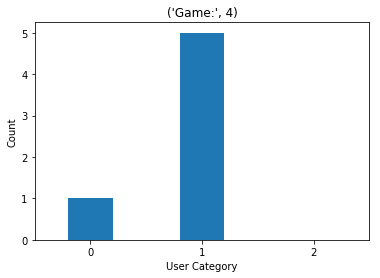

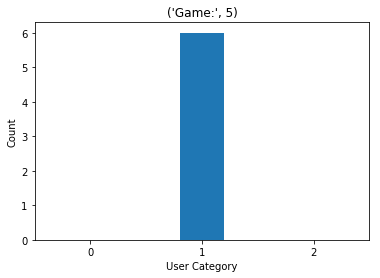

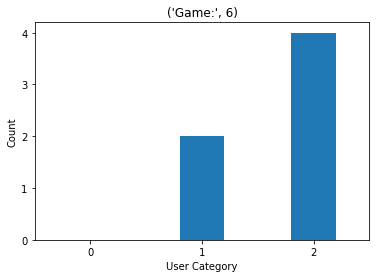

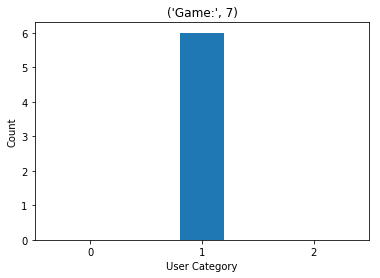

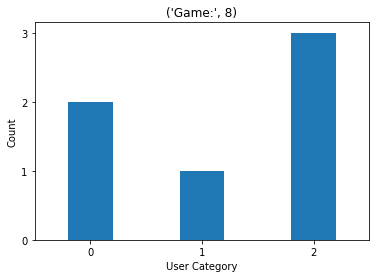

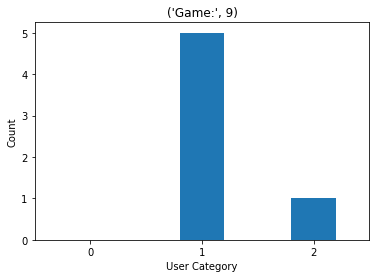

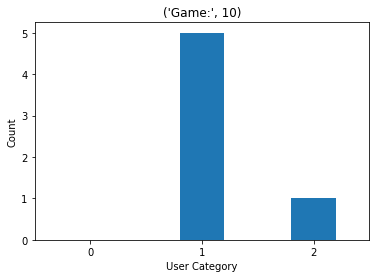

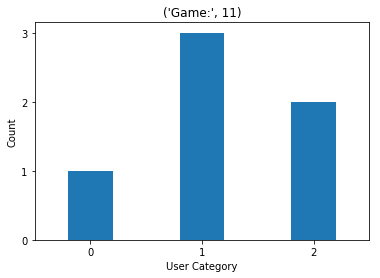

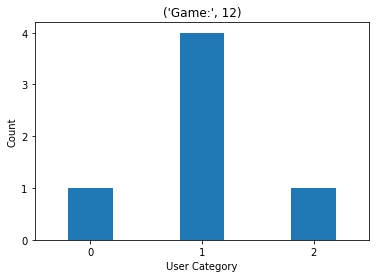

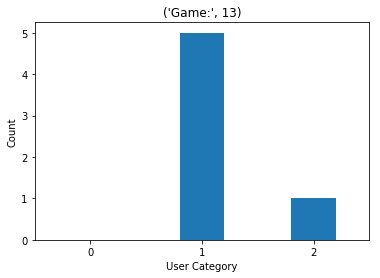

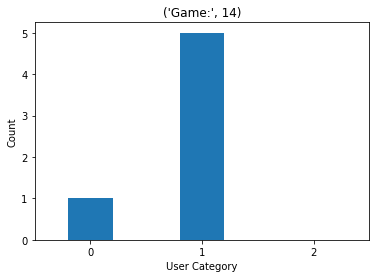

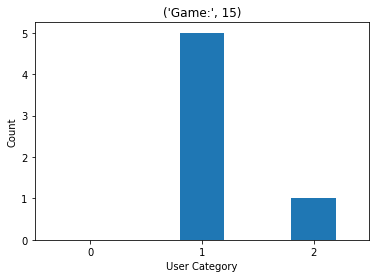

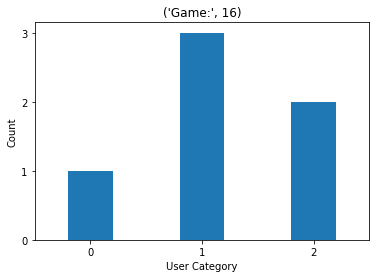

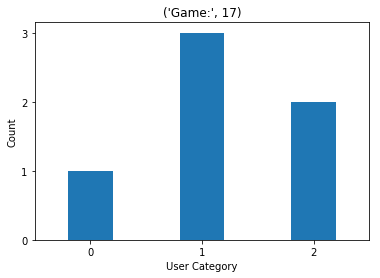

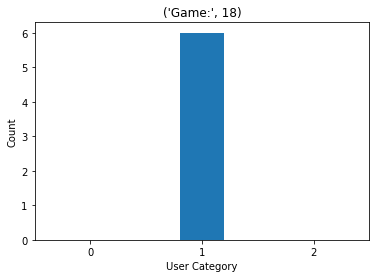

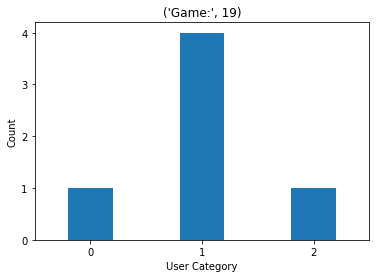

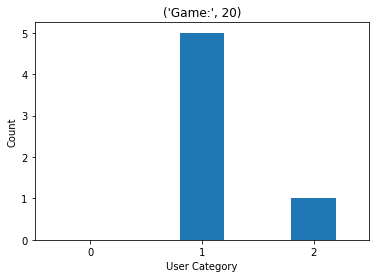

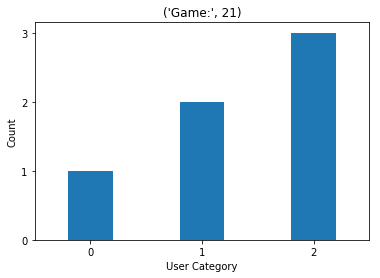

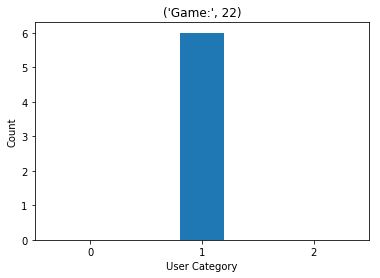

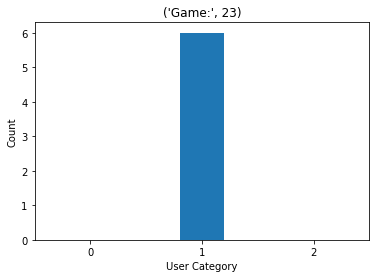

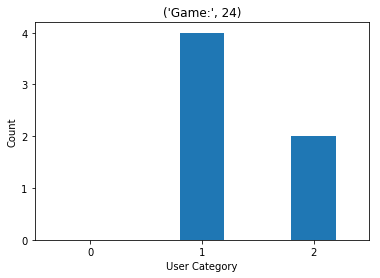

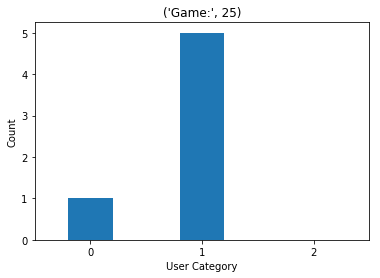

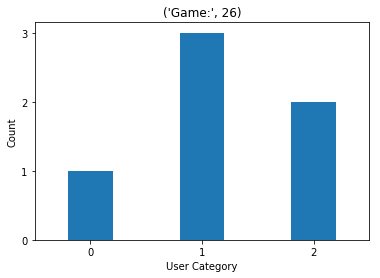

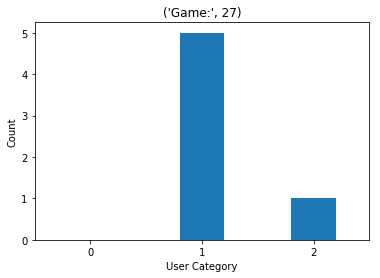

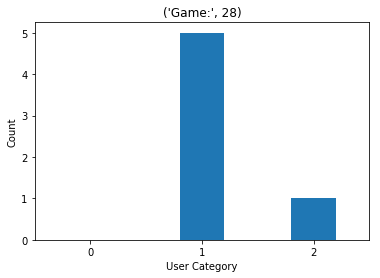

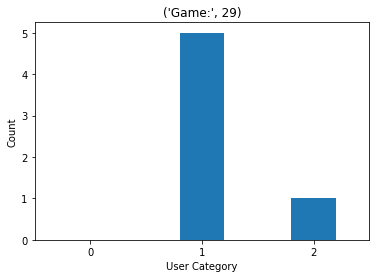

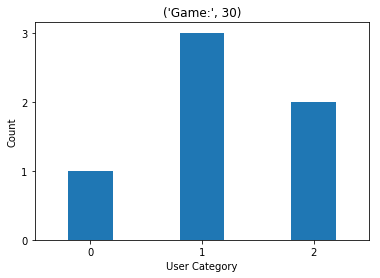

In [160]:
category_vil = categories(contr_vil, user_vil, 'category')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


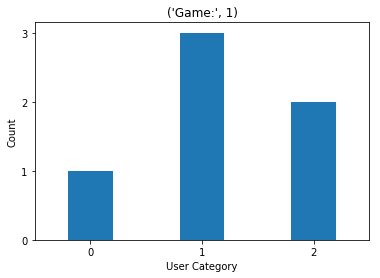

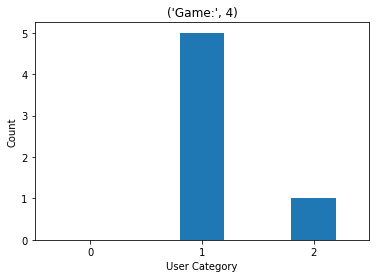

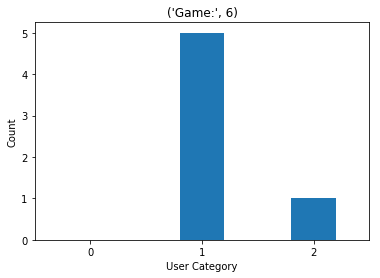

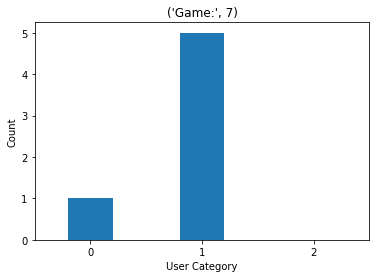

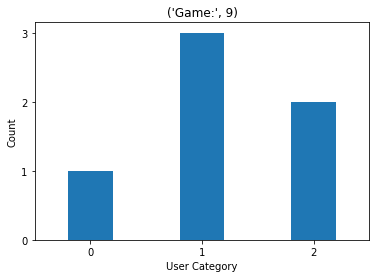

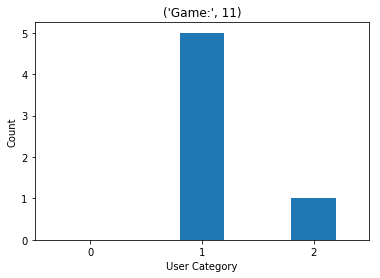

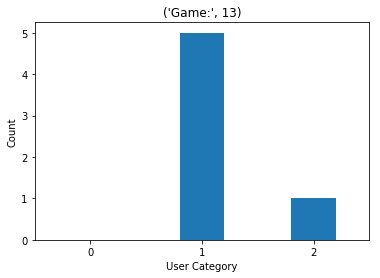

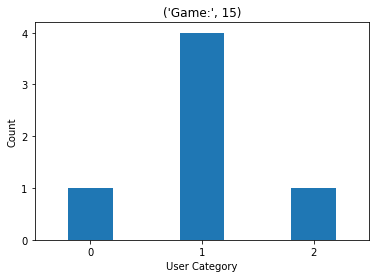

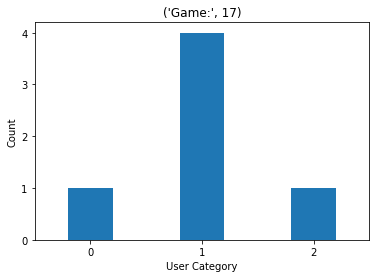

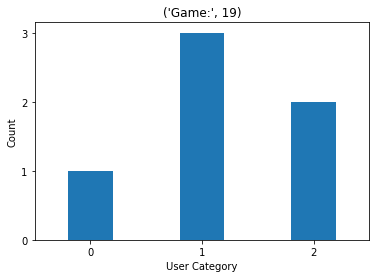

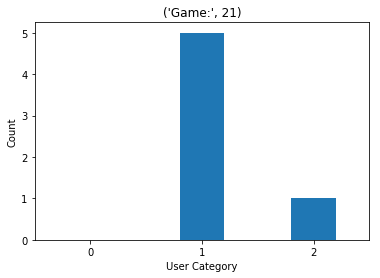

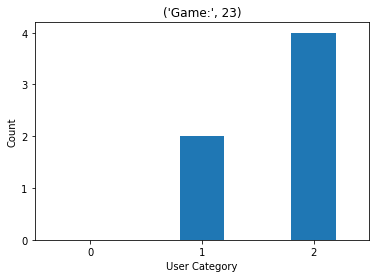

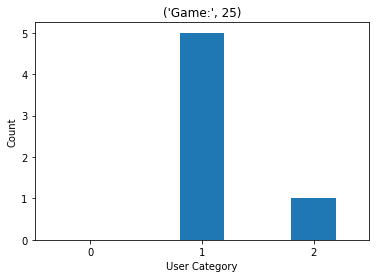

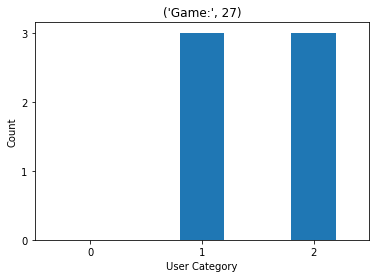

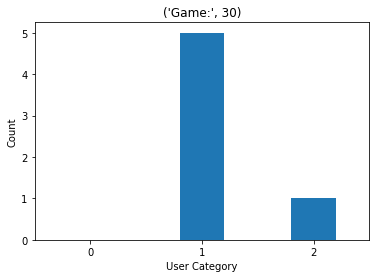

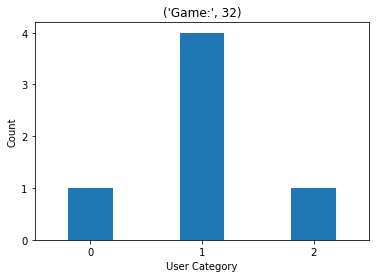

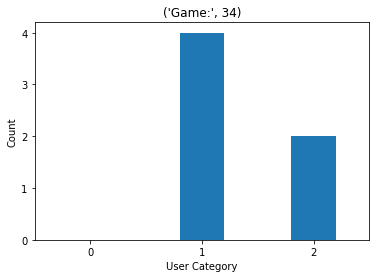

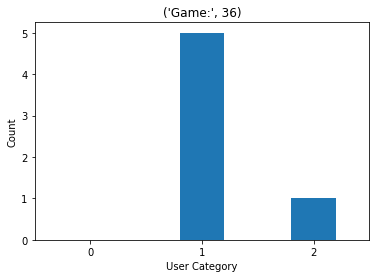

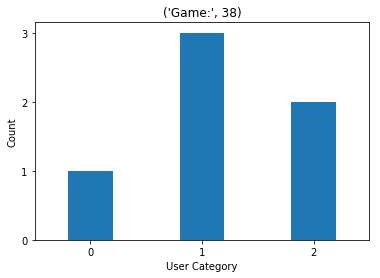

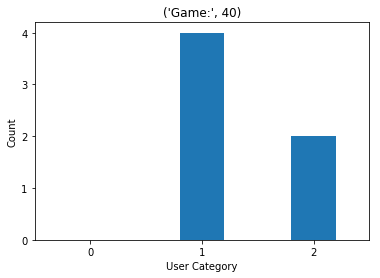

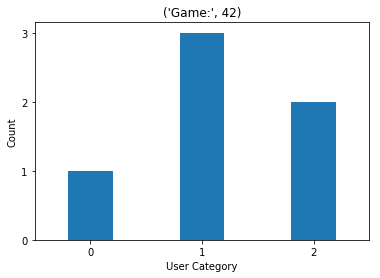

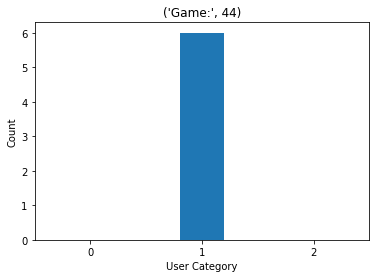

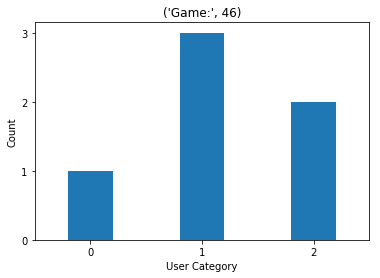

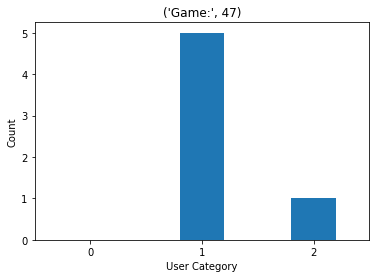

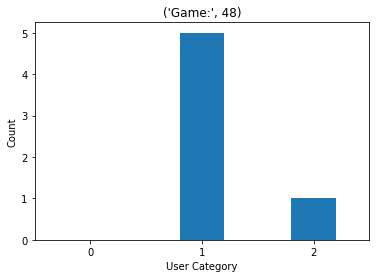

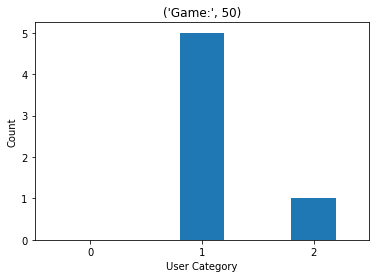

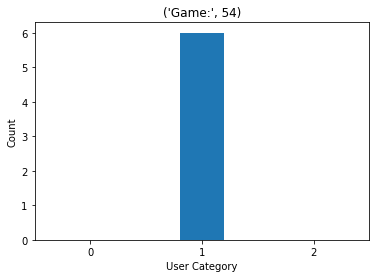

In [161]:
category_eq_dau = categories(eq_contr_dau, eq_user_dau,'category')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


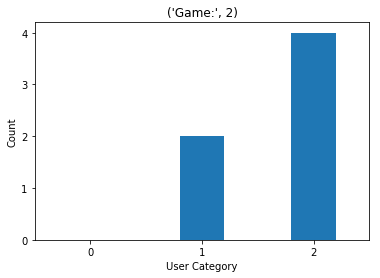

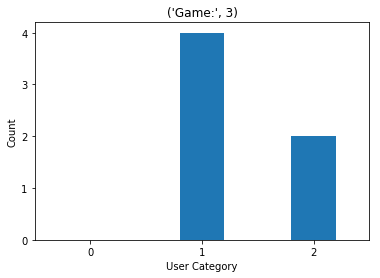

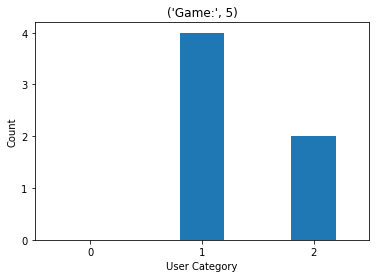

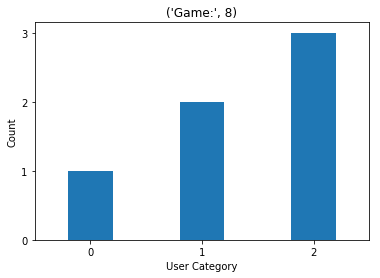

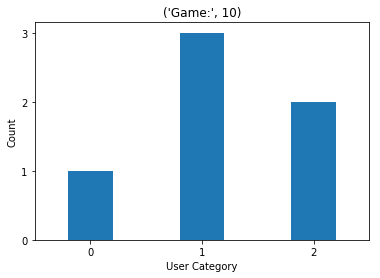

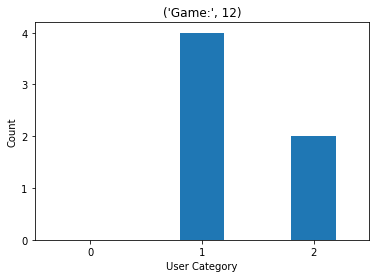

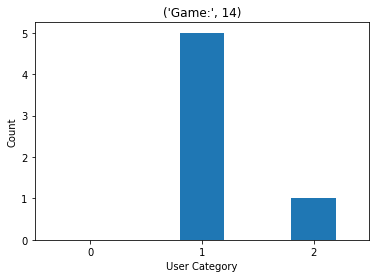

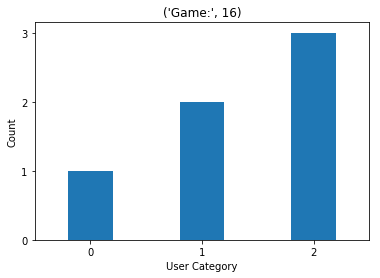

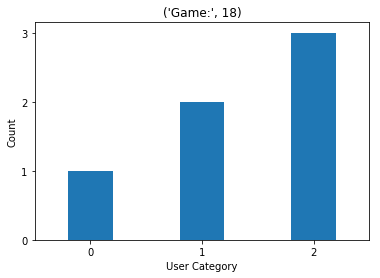

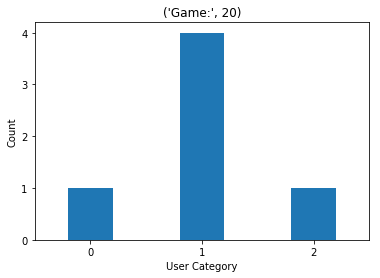

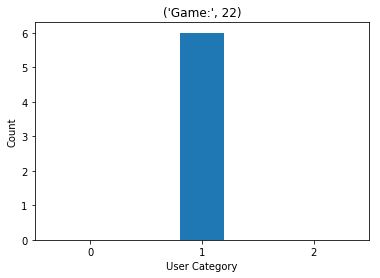

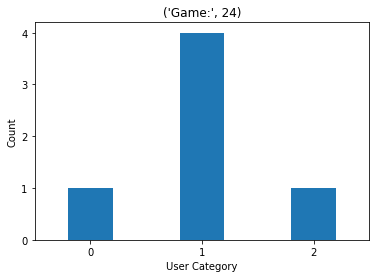

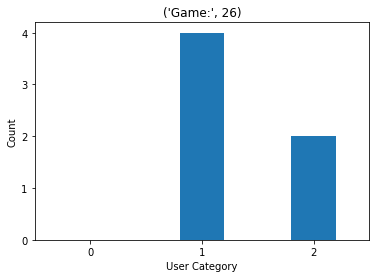

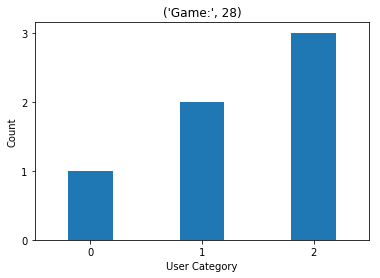

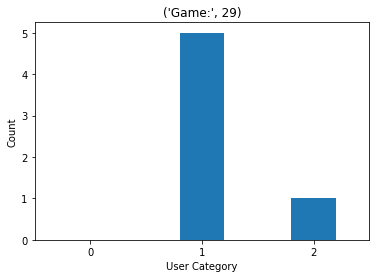

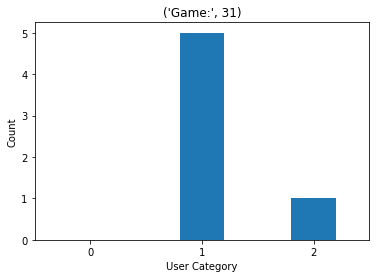

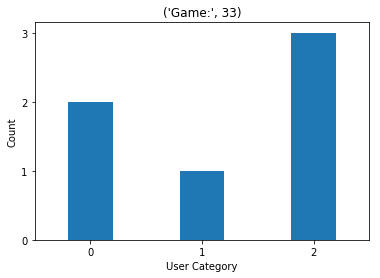

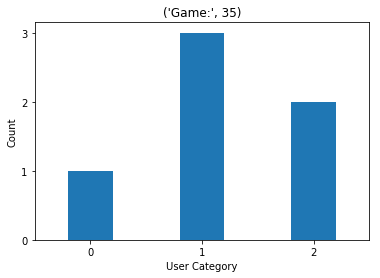

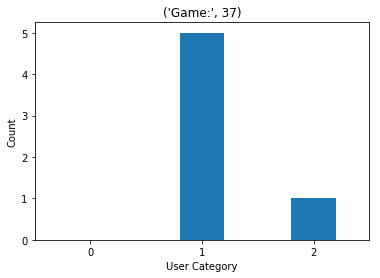

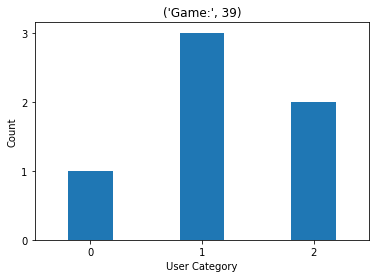

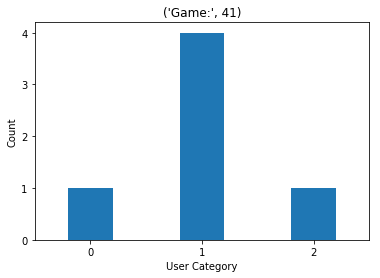

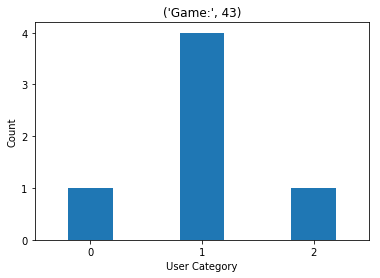

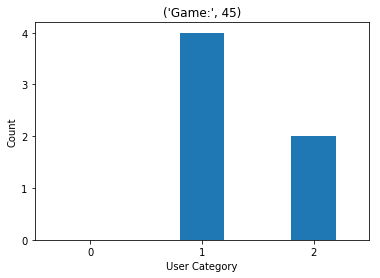

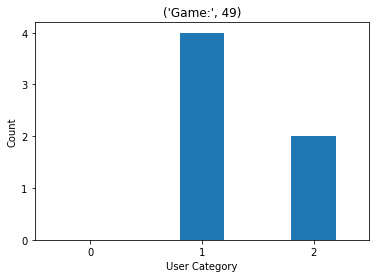

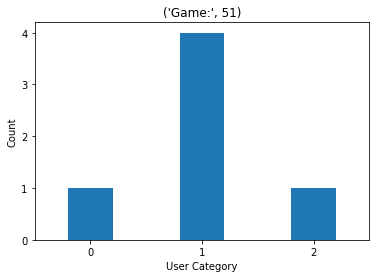

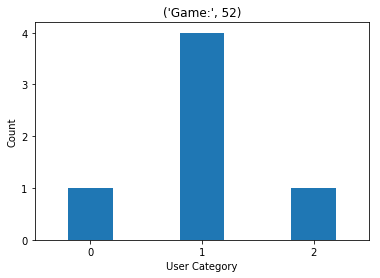

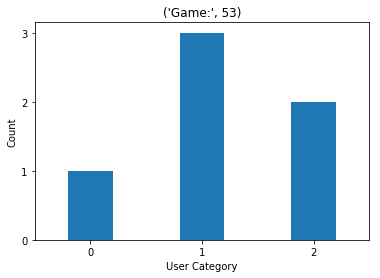

In [162]:
category_ineq_dau = categories(ineq_contr_dau, ineq_user_dau, 'category')

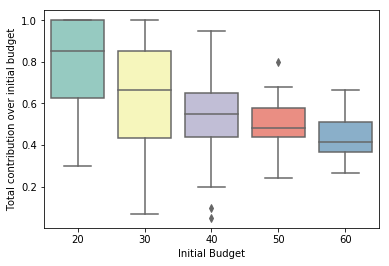

In [24]:
ax = sns.boxplot(x="diners_inicials", y="contr/budget", data=category_street, palette="Set3")
ax.set(xlabel='Initial Budget', ylabel='Total contribution over initial budget')
plt.show()

In [189]:
categ_het.groupby(['diners_inicials'])['mean_contr'].mean().values

array([ 1.48      ,  1.96444444,  2.13444444,  2.54888889,  2.70888889])

In [51]:
from scipy.stats import sem
categ_het.groupby(['diners_inicials'])['contr/budget'].sem()

diners_inicials
20    0.039364
30    0.037831
40    0.019937
50    0.021136
60    0.015783
Name: contr/budget, dtype: float64

In [50]:
categ_het.groupby(['diners_inicials'])['contr/budget'].mean()

diners_inicials
20    0.740000
30    0.654815
40    0.533611
50    0.509778
60    0.451481
Name: contr/budget, dtype: float64

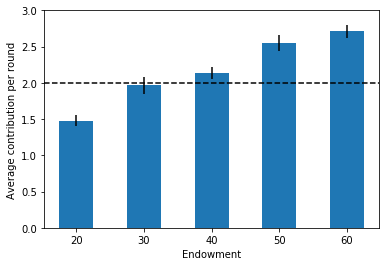

In [193]:
bins = np.linspace(0, 1, 20)

plt.bar(categ_het.groupby(['diners_inicials'])['mean_contr'].mean().index, 
        categ_het.groupby(['diners_inicials'])['mean_contr'].mean().values, 
         width=5,align='center', yerr=categ_het.groupby(['diners_inicials'])['mean_contr'].sem())

#plt.scatter(categ_het.groupby(['diners_inicials'])['contr/budget'].mean().index,
#            [1.0,1.0,1.0,0.8,2/3], c='black')
plt.axhline(y=2, color='black', linestyle='--')
plt.xlabel("Endowment")
plt.ylabel("Average contribution per round")
plt.legend(loc='upper right')
plt.ylim(0,3)
#plt.title('Proportional of capital contributed (heterogeneous)')
plt.show()

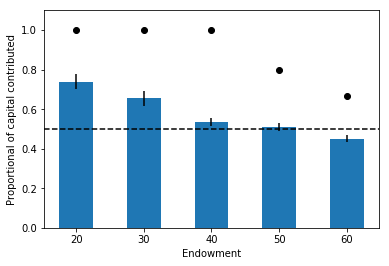

In [188]:
bins = np.linspace(0, 1, 20)

plt.bar(categ_het.groupby(['diners_inicials'])['contr/budget'].mean().index, 
        categ_het.groupby(['diners_inicials'])['contr/budget'].mean().values, 
         width=5,align='center', yerr=categ_het.groupby(['diners_inicials'])['contr/budget'].sem())

plt.scatter(categ_het.groupby(['diners_inicials'])['contr/budget'].mean().index,
            [1.0,1.0,1.0,0.8,2/3], c='black')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel("Endowment")
plt.ylabel("Proportional of capital contributed")
plt.legend(loc='upper right')
plt.ylim(0,1.1)
#plt.title('Proportional of capital contributed (heterogeneous)')
plt.show()

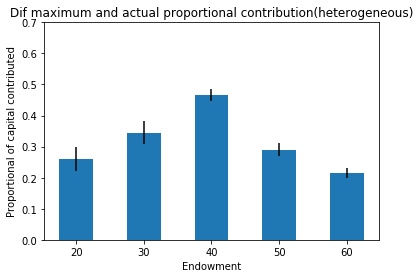

In [56]:
bins = np.linspace(0, 1, 20)

plt.bar(categ_het.groupby(['diners_inicials'])['contr/budget'].mean().index, 
        [1.0,1.0,1.0,0.8,2/3] - categ_het.groupby(['diners_inicials'])['contr/budget'].mean().values, 
         width=5,align='center', yerr=categ_het.groupby(['diners_inicials'])['contr/budget'].sem())

#plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel("Endowment")
plt.ylabel("Proportional of capital contributed")
plt.legend(loc='upper right')
plt.ylim(0,0.7)
plt.title('Dif maximum and actual proportional contribution(heterogeneous)')
plt.show()

array([ 0.26      ,  0.34518519,  0.46638889,  0.29022222,  0.21518519])

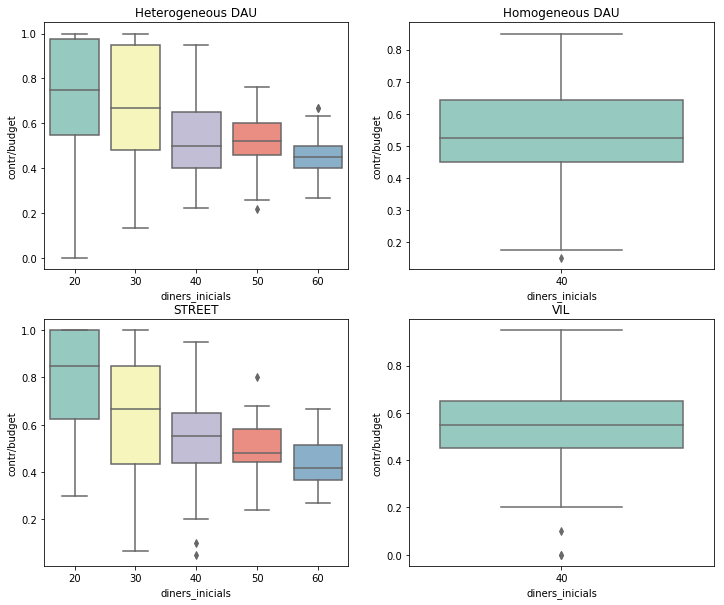

In [108]:
#fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_ineq_dau, palette="Set3", ax=axs[0,0]).set_title("Heterogeneous DAU")
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_eq_dau, palette="Set3", ax=axs[0,1]).set_title("Homogeneous DAU")
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_street, palette="Set3", ax=axs[1,0]).set_title("STREET")
sns.boxplot(x="diners_inicials", y="contr/budget", data=category_vil, palette="Set3", ax=axs[1,1]).set_title("VIL") 
    
plt.show()

## Total Contribution Ratio: PDF and CDF

In [18]:
categ_het = pd.read_csv("dades/categ_het.csv", delimiter=',' , encoding="latin-1")
categ_hom = pd.read_csv("dades/categ_hom.csv", delimiter=',' , encoding="latin-1")

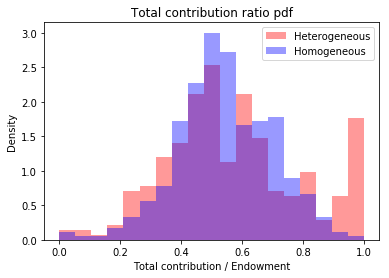

In [23]:
bins = np.linspace(0, 1, 20)

plt.hist(categ_het['contr/budget'], bins, alpha=0.4,density = True, label='Heterogeneous', color = 'red')
plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous', color = 'blue')
plt.xlabel("Total contribution / Endowment")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.title('Total contribution ratio pdf')
plt.show()

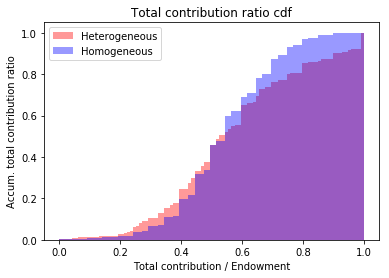

In [25]:
bins = np.linspace(0, 1, 100)

plt.hist(categ_het['contr/budget'], bins, alpha=0.4,density = True, cumulative=True, label='Heterogeneous', color = 'red')
plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True, label='Homogeneous', color = 'blue')
plt.legend(loc='upper left')
plt.xlabel("Total contribution / Endowment")
plt.ylabel("Accum. total contribution ratio")
plt.title('Total contribution ratio cdf')
plt.show()

## Analysis at game level (according their ending round)

### STREET:

#### Violin plot of the mean contribution according to genere:

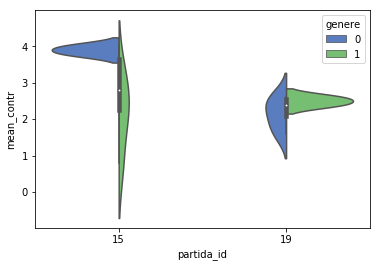

In [59]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==7]['partida_id']))])

We see opposite tendencies in both games. While in game 15 women have a wide range of mean contributions and men are who contribute around 4, in game 19 men exibit a wider range and women contrute a mean of 2.5.

### GAME 19:

#### Contribution table

In [61]:
##Analysis game 19: 
contr_game19 = contr_street.loc[user_street[user_street.partida_id==19]['user_id'],:]
contr_game19.mean(axis=1).mean()

2.2666666666666666

#### Evolution of contributions:

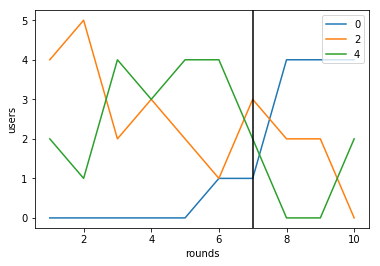

In [19]:
# STREET game 19:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game19[contr_game19 == 0].count(),label="0")
ax.plot(x, contr_game19[contr_game19 == 2].count(),label="2")
ax.plot(x, contr_game19[contr_game19 == 4].count(),label="4")
ax.axvline(x=7, c = "black")
plt.xlabel('rounds')
plt.ylabel('users')
plt.legend()
plt.show()

In [133]:
user_street[user_street.partida_id==19]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
116,117,Chusco,31000,h,36,r4,NaN,r1,r3,r2,...,False,False,19,0,1,r3,r4,44,10,0
117,118,Teo,8850,h,25,r6,NaN,r1,r2,r2,...,False,False,19,0,4,r1,r1,4,10,0
118,119,Eva Ruiz,8015,d,37,r6,NaN,NaN,NaN,NaN,...,False,False,19,0,5,NaN,NaN,16,10,1
119,120,Lobo,8003,h,44,r5,NaN,r1,r2,r2,...,False,False,19,0,3,r3,r3,0,10,0
120,121,Ale,8028,d,28,r6,NaN,r1,r3,r1,...,False,True,19,0,6,r2,r3,14,10,0
121,122,Ruth,8320,h,28,r5,NaN,r1,r2,r2,...,True,False,19,0,2,r2,r3,26,10,0


In game 19 we have that 2/3 of participants are males and 1/3 females. In this game all players had an university degree. 

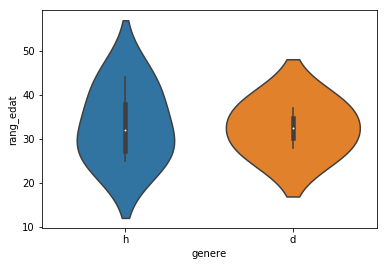

In [21]:
ax = sns.violinplot(x="genere", y="rang_edat", data=user_street[user_street.partida_id==19],
               order=["h", "d"])
plt.show()

In [134]:
user_street[user_street.user_id ==120]['diners_inicials']
#A user having 50 follows an altruist behavior. Final gain: 10um

119    20
Name: diners_inicials, dtype: int64

### GAME 15:

#### Contribution table

In [62]:
##Analysis game 15: 

contr_game15 = contr_street.loc[user_street[user_street.partida_id==15]['user_id'],:]
contr_game15.mean(axis=1).mean()

2.733333333333333

In [63]:
## Mean contribution for games 15 and 19

np.mean([contr_game15.mean(axis=1).mean(),contr_game19.mean(axis=1).mean()])

2.5

### Normalized result: 
Whatching at the sum of the normalized contributions we see that the one that the one that has a higher initial budget contributes proportionally less. This result is much smaller as there are three users that contributes a lot besides the objectives was fulfilled. 

In [23]:
contr_game15_n = contr_street_norm.loc[user_street[user_street.partida_id==15]['user_id'],:]
contr_game15_n.sum(axis=1)

user_id
87    8.000000
88    8.000000
89    4.000000
90    9.500000
91    3.666667
92    8.000000
dtype: float64

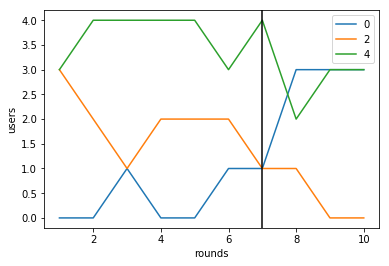

In [24]:
# STREET game 15:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game15[contr_game15 == 0].count(),label="0")
ax.plot(x, contr_game15[contr_game15 == 2].count(),label="2")
ax.plot(x, contr_game15[contr_game15 == 4].count(),label="4")
plt.xlabel('rounds')
plt.ylabel('users')
ax.axvline(x=7, c = "black")
plt.legend()

In five rounds there were four users that contribute 4 to the common fond. We have a free rider in this game (four contributions of 2 and six of 0). It seems that the user contributes 2 whatching the rest of players and finally opt for 0 having the other player contributing 4 in all rounds.
In this game we have three users that behave altruistic. These players are: 87, 90, 92

In [25]:
user_street[user_street.partida_id==15]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
86,87,Yoconozco@yahoo.es,8012,h,43,r6,NaN,r1,r1,r1,...,False,False,15,0,5,r1,r4,10,10,0
87,88,Mayesta,8003,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,2,r1,r4,6,10,0
88,89,Yo,2001,d,36,r6,NaN,r1,r2,r2,...,True,True,15,0,3,r1,r3,12,9,0
89,90,Jose,8001,h,31,r6,NaN,r1,r1,r2,...,False,False,15,0,1,r1,r4,2,10,0
90,91,PICADILLO,8010,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,6,r3,r4,38,10,1
91,92,Jess,13055,d,32,r6,NaN,r1,r3,r2,...,False,False,15,0,4,r1,r3,8,10,0


#### Altruistic:

In [26]:
user_street[user_street.user_id == 87]['diners_inicials']
#A user having 50 follows an altruist behavior. Final gain: 10um

86    50
Name: diners_inicials, dtype: int64

In [27]:
user_street[user_street.user_id == 90]['diners_inicials']

89    40
Name: diners_inicials, dtype: int64

In [28]:
user_street[user_street.user_id == 92]['diners_inicials']

91    40
Name: diners_inicials, dtype: int64

#### Free-Rider:

In [29]:
user_street[user_street.user_id == 89]['diners_inicials']
#The free rider had the minimum initial budget. Final gain: 16um

88    20
Name: diners_inicials, dtype: int64

In game 19 we have that 2/3 of participants are males and 1/3 females. All participants had university degree. 

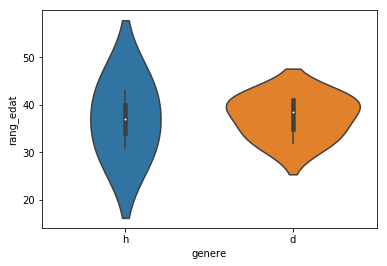

In [30]:
ax = sns.violinplot(x="genere", y="rang_edat", data=user_street[user_street.partida_id==15],
               order=["h", "d"])
plt.show()

## Ending at round 8:

### STREET DATABASE

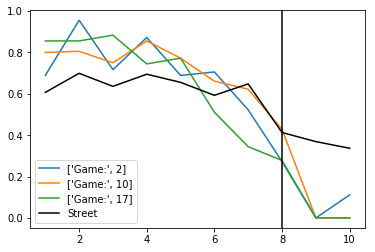

In [31]:
ending_game(final_street, contr_street_norm, user_street, 8,"Street")

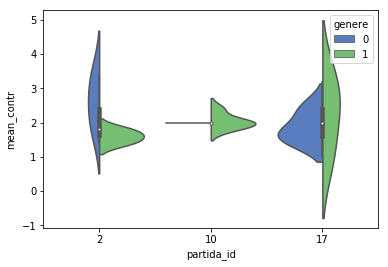

In [32]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==8]['partida_id']))])


### GAME 10:

In [34]:
## Game 10 - ending at round 8
user_street[user_street.partida_id==10]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
55,56,Ant,8006,d,17,r3,NaN,r1,r2,r2,...,False,True,10,0,4,r1,r4,20,10,0
56,57,Maria,8006,d,17,r4,NaN,r1,r2,r2,...,True,True,10,0,5,r1,r3,22,10,0
57,58,Irina,8006,d,17,r3,NaN,r1,r2,r2,...,False,False,10,0,1,r2,r2,10,10,0
58,59,Paloma,8034,d,44,r4,NaN,r1,r2,r4,...,True,False,10,0,2,r1,r2,0,10,0
59,60,Monica,8023,d,20,r4,NaN,r1,r1,r2,...,False,False,10,0,3,r1,r1,36,10,1
60,61,Pau,8840,h,26,r7,NaN,r1,r1,r1,...,False,True,10,0,6,r3,r2,30,10,0


#### Contribution table:

In [35]:
##Analysis game 10: 
contr_game10 = contr_street.loc[user_street[user_street.partida_id==10]['user_id'],:]
contr_game10

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
56,2,4,2,4,4,0,4,0,0,0
57,2,2,4,4,2,2,0,2,0,0
58,2,4,4,2,2,4,2,0,0,0
59,4,4,2,2,2,2,2,2,0,0
60,2,0,4,4,4,2,4,4,0,0
61,4,0,0,4,4,4,2,2,0,0


In [36]:
contr_game10_n = contr_street_norm.loc[user_street[user_street.partida_id==10]['user_id'],:]
print(contr_game10_n.sum(axis=1))

user_id
56     5.000000
57     4.500000
58     6.666667
59    10.000000
60     4.000000
61     4.000000
dtype: float64


#### Altruistic:

In [37]:
user_street[user_street.user_id == 59]['diners_inicials']

58    20
Name: diners_inicials, dtype: int64

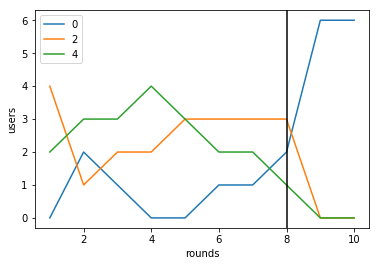

In [38]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game10[contr_game10 == 0].count(),label="0")
ax.plot(x, contr_game10[contr_game10 == 2].count(),label="2")
ax.plot(x, contr_game10[contr_game10 == 4].count(),label="4")

plt.xlabel('rounds')
plt.ylabel('users')
ax.axvline(x=8, c = "black")
plt.legend()


### GAME 2: 

Users Information:
    user_id nickname  codi_postal genere  rang_edat nivell_estudis  prfinal0  \
6         7     Aure         8025      d         26             r6       NaN   
7         8   MercÃ¨         8022      d         41             r6       NaN   
8         9     Coia         8016      h         57             r6       NaN   
9        10  Miranfu         8008      d         47             r6       NaN   
10       11      SvK         8197      h         38             r6       NaN   
11       12  Marieta         8205      h         62             r6       NaN   

   prfinal1 prfinal2 prfinal3   ...   check_2 check_3 partida_id is_robot  \
6        r1       r2       r2   ...     False   False          2        0   
7        r1       r2       r2   ...     False   False          2        0   
8        r1       r2       r2   ...     False   False          2        0   
9        r1       r2       r1   ...     False   False          2        0   
10       r1       r1       r1   ...

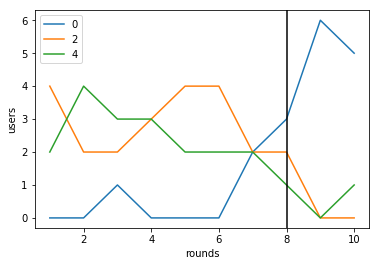

In [39]:
game_anal(contr_street,contr_street_norm,user_street,2,8)

#### Altruistic:

In [40]:
user_street[user_street.user_id == 9]['diners_inicials']

8    20
Name: diners_inicials, dtype: int64

### GAME 17

Users Information:
     user_id         nickname  codi_postal genere  rang_edat nivell_estudis  \
103      104  Rata laboratori         8030      h         32             r5   
104      105         Wagingey        17251      d         37             r6   
105      106           rraaps         8030      d         53             r6   
106      107             aiwa         8003      d         39             r6   
107      108            Ninyo        17200      h         45             r5   
108      109         Santiago         8030      h         53             r6   

     prfinal0 prfinal1 prfinal2 prfinal3   ...   check_2 check_3 partida_id  \
103       NaN       r1       r1       r2   ...     False    True         17   
104       NaN       r1       r3       r2   ...     False   False         17   
105       NaN       r1       r1       r1   ...     False   False         17   
106       NaN       r1       r2       r4   ...     False   False         17   
107       NaN       r1       r2 

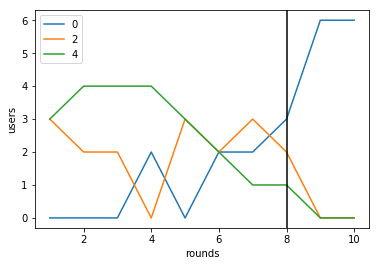

In [41]:
game_anal(contr_street,contr_street_norm, user_street, 17,8)

#### Altruistic: 

In [42]:
user_street[user_street.user_id == 106]['diners_inicials']

105    60
Name: diners_inicials, dtype: int64

In [43]:
user_street[user_street.user_id == 107]['diners_inicials']

106    40
Name: diners_inicials, dtype: int64

In [44]:
user_street[user_street.user_id == 108]['diners_inicials']

107    20
Name: diners_inicials, dtype: int64

## Ending at round 9:

### STREET DATABASE

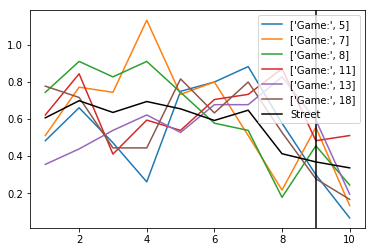

In [45]:
ending_game(final_street, contr_street_norm, user_street, 9,"Street")

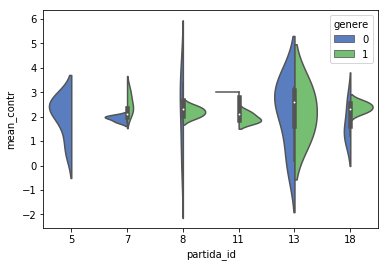

In [46]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==9]['partida_id']))])


## Ending at round 10:

### STREET DATABASE

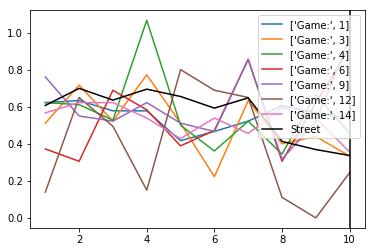

In [47]:
ending_game(final_street, contr_street_norm, user_street, 10,"Street")

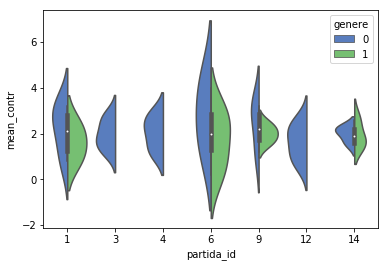

In [48]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==10]['partida_id']))])


In [64]:
contr_game1 = contr_street.loc[user_street[user_street.partida_id==1 ]['user_id'],:]
contr_game3 = contr_street.loc[user_street[user_street.partida_id==3 ]['user_id'],:]
contr_game4 = contr_street.loc[user_street[user_street.partida_id==4 ]['user_id'],:]
contr_game6 = contr_street.loc[user_street[user_street.partida_id==6 ]['user_id'],:]
contr_game9 = contr_street.loc[user_street[user_street.partida_id==9 ]['user_id'],:]
contr_game12 = contr_street.loc[user_street[user_street.partida_id==12]['user_id'],:]
contr_game14 = contr_street.loc[user_street[user_street.partida_id==14]['user_id'],:]

In [65]:
## Mean contribion of users in games that end at round 10
np.mean([contr_game1.mean(axis=1).mean(),contr_game3.mean(axis=1).mean(),contr_game4.mean(axis=1).mean(),
        contr_game6.mean(axis=1).mean(),contr_game9.mean(axis=1).mean(),contr_game12.mean(axis=1).mean(),
        contr_game14.mean(axis=1).mean()])

1.9904761904761903

### GAME 6:

#### Mean Contribution of game 6:

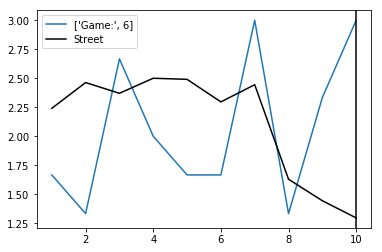

In [49]:
final = final_street[final_street.partida_id == 6]
mean_contr_street= contr_street.mean(axis=0)
#Plot
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)

for i in final.partida_id.unique():
    game_contr = contr_street.loc[list(user_street[user_street.partida_id==i].user_id),:]
    mean_contr_game = game_contr.describe().loc['mean',:]
    ax.plot(x, mean_contr_game, label=["Game:",i])

ax.plot(x, mean_contr_street,label='Street',c = 'black')
ax.axvline(x=10, c = "black")
plt.legend()

Users Information:
    user_id nickname  codi_postal genere  rang_edat nivell_estudis  prfinal0  \
31       32    Lluna         8193      d         17             r4       NaN   
32       33    Heras         8197      h         17             r3       NaN   
33       34    Mekii         8820      d         17             r5       NaN   
34       35  Celiamp         8024      d         16             r3       NaN   
35       36   Nuriam         8031      d         17             r3       NaN   
36       37    Marcb         8100      h         16             r3       NaN   

   prfinal1 prfinal2 prfinal3   ...   check_2 check_3 partida_id is_robot  \
31       r1       r1       r3   ...     False   False          6        0   
32       r1       r2       r2   ...     False   False          6        0   
33       r1       r2       r4   ...      True    True          6        0   
34       r1       r1       r4   ...     False    True          6        0   
35       r1       r1       r2   ...

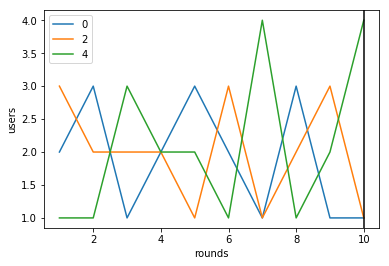

In [50]:
game_anal(contr_street,contr_street_norm,user_street, 6, 10)

#### Altruistic:

In [51]:
user_street[user_street.user_id == 32]['diners_inicials']

31    30
Name: diners_inicials, dtype: int64

In [52]:
user_street[user_street.user_id == 37]['diners_inicials']

36    20
Name: diners_inicials, dtype: int64

In [53]:
user_street[user_street.user_id == 33]['diners_inicials']

32    60
Name: diners_inicials, dtype: int64

#### Free Riding:

In [54]:
user_street[user_street.user_id == 34]['diners_inicials']

33    40
Name: diners_inicials, dtype: int64

## Homogeneous DAU database: 

### Ending games at round 7:

[[23,            1     2     3     4    5     6     7     8    9     10
  user_id                                                          
  134      0.25  0.50  0.50  0.75  1.0  0.75  0.50  0.50  1.0  0.75
  135      1.00  1.00  1.00  1.00  1.0  1.00  1.00  1.00  0.0  0.00
  136      0.50  1.00  1.00  0.75  0.5  0.75  0.75  0.75  0.0  0.25
  137      1.00  1.00  0.75  0.50  1.0  0.50  0.75  1.00  1.0  1.00
  138      0.50  0.50  0.75  0.50  0.5  0.75  1.00  1.00  1.0  1.00
  139      0.50  0.75  1.00  1.00  1.0  1.00  1.00  0.25  1.0  1.00],
 [25,            1     2     3     4     5     6     7     8    9    10
  user_id                                                          
  143      0.50  0.50  0.50  0.50  0.50  0.50  0.50  0.50  0.5  0.5
  147      0.75  0.50  1.00  0.50  0.75  1.00  0.50  0.25  0.0  0.0
  148      0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.00  0.0  0.0
  149      0.50  0.50  1.00  1.00  1.00  1.00  1.00  0.00  1.0  1.0
  151      0.50  0.75  0.75  1.00  0.7

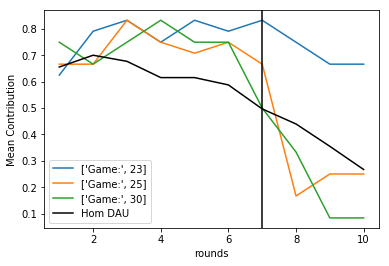

In [61]:
final_hom_dau=final_dau[final_dau.index.isin(eq_user_dau.partida_id.unique())]
ending_game(final_hom_dau, eq_contr_dau_norm, eq_user_dau, 7,"Hom DAU")

In [64]:
##Analysis game 15: 
contr_game23 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==23].index,:]
contr_game23.mean(axis=1).mean()

contr_game25 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==25].index,:]
contr_game25.mean(axis=1).mean()

contr_game30 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==30].index,:]
contr_game30.mean(axis=1).mean()

np.mean([contr_game23.mean(axis=1).mean(),contr_game25.mean(axis=1).mean(),contr_game30.mean(axis=1).mean()])

2.5000000000000004

[[4,            1     2     3     4     5     6     7     8     9     10
  user_id                                                            
  20       0.25  0.50  0.75  0.50  0.50  0.50  0.75  0.25  0.50  0.50
  21       0.50  0.50  0.75  0.25  1.00  0.50  1.00  0.75  0.00  0.50
  22       0.50  1.00  0.75  0.50  0.25  0.25  0.50  0.25  1.00  0.75
  23       0.50  0.75  1.00  0.00  0.25  0.75  0.00  0.00  0.25  0.00
  24       0.50  0.75  0.25  0.25  0.75  0.50  0.25  0.00  0.50  0.50
  25       0.50  1.00  0.75  0.75  0.50  0.50  1.00  0.25  0.75  0.75],
 [6,            1     2     3     4     5     6     7     8     9     10
  user_id                                                            
  31       0.50  0.75  1.00  0.25  0.75  0.25  0.25  0.00  0.25  0.25
  33       0.25  0.50  0.25  0.75  0.25  0.00  0.50  0.50  1.00  0.75
  34       0.25  0.50  1.00  1.00  0.00  0.25  0.50  0.75  0.25  0.25
  35       0.50  1.00  0.25  0.75  0.75  1.00  0.50  0.75  0.25  0.00
  37       0

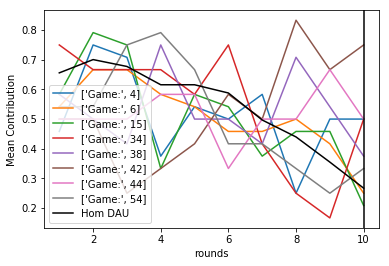

In [67]:
### Ending games at round 10
ending_game(final_hom_dau, eq_contr_dau_norm, eq_user_dau, 10,"Hom DAU")

In [69]:
##Analysis game 15: 
contr_game4 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==4].index,:].mean(axis=1).mean()
contr_game6 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==6].index,:].mean(axis=1).mean()
contr_game15 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==15].index,:].mean(axis=1).mean()
contr_game34 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==34].index,:].mean(axis=1).mean()
contr_game38 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==38].index,:].mean(axis=1).mean()
contr_game42 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==42].index,:].mean(axis=1).mean()
contr_game44 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==44].index,:].mean(axis=1).mean()
contr_game54 = eq_contr_dau.loc[eq_user_dau[eq_user_dau.partida_id==54].index,:].mean(axis=1).mean()

np.mean([contr_game4,contr_game6,contr_game15,contr_game34,contr_game38,contr_game42,
        contr_game44,contr_game54])

2.0791666666666666

## Ending at round 7:

### VIL DATABASE

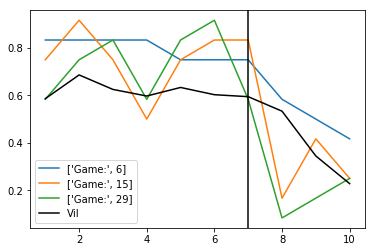

In [55]:
ending_game(final_vil, contr_vil_norm, user_vil, 7,"Vil")

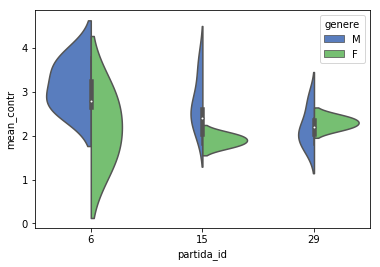

In [56]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==7]['partida_id']))])


### GAME 6:

#### Contribution table

In [66]:
##Analysis game 6: 
contr_game6 = contr_vil.loc[user_vil[user_vil.partida_id==6]['user_id'],:]
contr_game6.mean(axis=1).mean()

2.8333333333333335

#### Evolution of contribution

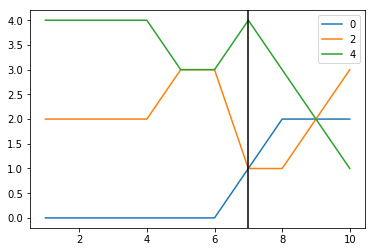

In [67]:
# VIL game 6:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, contr_game6[contr_game6 == 0].count(),label="0")
ax.plot(x, contr_game6[contr_game6 == 2].count(),label="2")
ax.plot(x, contr_game6[contr_game6 == 4].count(),label="4")
ax.axvline(x=7, c = "black")
plt.legend()
plt.show()

In this case we don't have free riders. There are two persons that contributes closed to perfect altruist. 

In [68]:
user_vil[user_vil.partida_id==6]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,situacio_laboral,estat_civil,num_jugador,acabat,...,prfinal5,prfinal6,prfinal7,prfinal8,prfinal9,prfinal10,prfinal11,prfinal12,prfinal13,bots
30,31,Bernaz,8840,M,r7,r2,r1,r2,5.0,1,...,r2,r6,r3,r5,r4,r2,r2,r1 r2,Comercio\r\r,0
31,32,Yolanda,8840,F,r5,r2,r1,r2,4.0,1,...,r1,na,r3,r3,r1,r2,r1,r5,Arreglar pavimento y mas verde le falta luz en...,0
32,33,Macame,8840,F,r5,r6,r3,r5,3.0,1,...,r1,na,r4,r5,r4,r2,r2,r1,Tiendas.,0
33,34,cristicoteca,8840,M,r5,r6,r3,r2,1.0,1,...,r2,r2 r3 r4 r11,r4,r4,r1,r1,r2,r1 r2 r4,Mes botigues,0
34,35,Juanmi,8840,M,r5,r2,r3,r2,2.0,1,...,r2,r4 r5 r6 r7 r8,r3,r3,r1,r1,r2,r1,Míçs tranquilidad,0
35,36,Toni,8840,M,r5,r5,r3,r2,6.0,1,...,r1,na,r5,r4,r1,r1,r2,r2,Restrincon del trafico,0


### GAME 15:

#### Contribution table

In [72]:
##Analysis game 15: 
contr_game15 = contr_vil.loc[user_vil[user_vil.partida_id==15]['user_id'],:]
contr_game15.mean(axis=1).mean()

2.466666666666667

In [73]:
contr_game29 = contr_vil.loc[user_vil[user_vil.partida_id==29]['user_id'],:]
contr_game29.mean(axis=1).mean()

2.233333333333333

In [74]:
np.mean([contr_game6.mean(axis=1).mean(),contr_game15.mean(axis=1).mean(),contr_game29.mean(axis=1).mean()])

2.5111111111111111

## Ending round 8

### VIL dataset

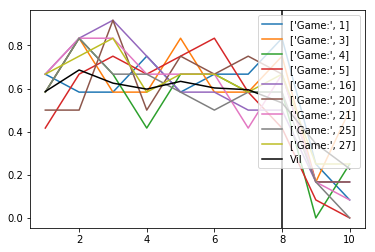

In [37]:
ending_game(final_vil, contr_vil_norm, user_vil, 8,"Vil")

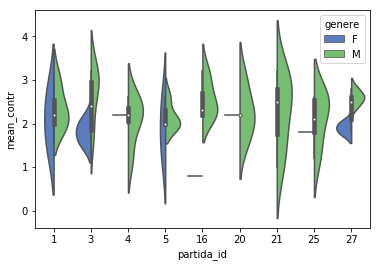

In [38]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==8]['partida_id']))])


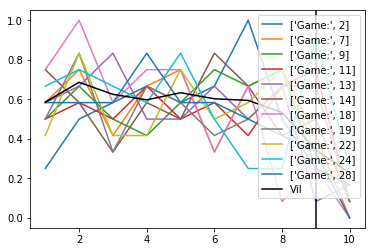

In [39]:
ending_game(final_vil, contr_vil_norm, user_vil, 9,"Vil")

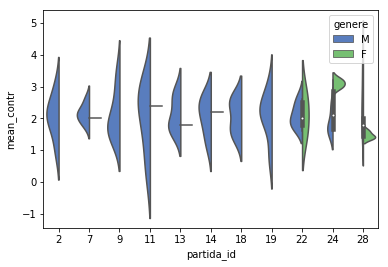

In [40]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==9]['partida_id']))])


## Ending round at 10: 

### VIL dataset:

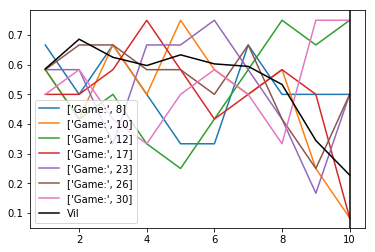

In [41]:
ending_game(final_vil, contr_vil_norm, user_vil, 10,"Vil")

In [75]:
contr_game8 = contr_vil.loc[user_vil[user_vil.partida_id==8 ]['user_id'],:]
contr_game10 = contr_vil.loc[user_vil[user_vil.partida_id==10]['user_id'],:]
contr_game12 = contr_vil.loc[user_vil[user_vil.partida_id==12]['user_id'],:]
contr_game17 = contr_vil.loc[user_vil[user_vil.partida_id==17]['user_id'],:]
contr_game23 = contr_vil.loc[user_vil[user_vil.partida_id==23]['user_id'],:]
contr_game26 = contr_vil.loc[user_vil[user_vil.partida_id==26]['user_id'],:]
contr_game30 = contr_vil.loc[user_vil[user_vil.partida_id==30]['user_id'],:]

In [76]:
## Mean contribion of users in games that end at round 10
np.mean([contr_game8.mean(axis=1).mean(),contr_game10.mean(axis=1).mean(),contr_game12.mean(axis=1).mean(),
        contr_game17.mean(axis=1).mean(),contr_game23.mean(axis=1).mean(),contr_game26.mean(axis=1).mean(),
        contr_game30.mean(axis=1).mean()])

2.0714285714285712

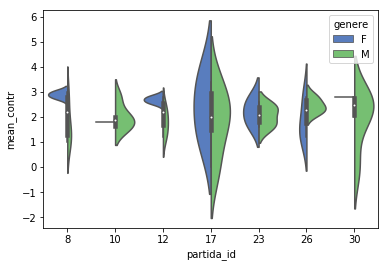

In [42]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==10]['partida_id']))])


In [43]:
## STREET case: 
## How many games finish at round 7?
final7 = final_street[final_street.ronda_obj==7]
final7

,partida_id,ronda_obj
partida_id,,
15,15,7
19,19,7


In [44]:
## Game ending at round 7
game15_contr_s = contr_street_norm.loc[list(user_street[user_street.partida_id==15].user_id),:]
game19_contr_s = contr_street_norm.loc[list(user_street[user_street.partida_id==19].user_id),:]

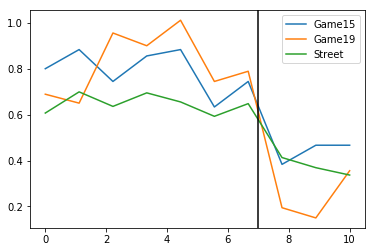

In [45]:
# Mean contribution per round
mean_contr_game15_s = game15_contr_s.describe().loc['mean',:]
mean_contr_game19_s = game19_contr_s.describe().loc['mean',:]
mean_contr_street= contr_street_norm.mean(axis=0)

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_game15_s,label="Game15")
ax.plot(x, mean_contr_game19_s,label="Game19")
ax.plot(x, mean_contr_street,label="Street")
ax.axvline(x=7, c = "black")
plt.legend()

In [46]:
## How many games finish at round 7?
final8 = final_street[final_street.ronda_obj==8]
final8

,partida_id,ronda_obj
partida_id,,
2,2,8
10,10,8
17,17,8


In [39]:
## DAU case: 
## How many games finish at round 6?
final6 = final_dau[final_dau.ronda_obj==6]
## Game 2 is heterogeneous

## How many games finish at round 7?
final7 = final_dau[final_dau.ronda_obj==7]
## Games 3 and 12 are heterogeneous
## Games 23, 25 and 30 are heterogeneous

In [35]:
## How many games finish at round 8?
final8 = final_dau[final_dau.ronda_obj==8]
final8.shape

(15, 2)

In [36]:
## How many games finish at round 9?
final9 = final_dau[final_dau.ronda_obj==9]
final9.shape

(14, 2)

In [37]:
## How many games finish at round 10?
final10 = final_dau[final_dau.ronda_obj==10]
final10.shape

(19, 2)

In [38]:
### Partida 2 end the game in 6 rounds. Which users
final7.partida_id.unique

<bound method Series.unique of partida_id
3      3
12    12
23    23
25    25
30    30
Name: partida_id, dtype: int64>

In [50]:
list(ineq_user_dau[ineq_user_dau.partida_id==2].user_id)

[5, 9, 10, 11, 12, 14]

In [77]:
## Game ending at round 6
game2_contr = ineq_contr_dau_norm.loc[list(ineq_user_dau[ineq_user_dau.partida_id==2].user_id),:]*10
game2_contr.describe().loc['mean',:]

ronda_id
1     0.841667
2     1.050000
3     0.952778
4     1.077778
5     0.786111
6     0.655556
7     0.525000
8     0.461111
9     0.816667
10    0.416667
Name: mean, dtype: float64

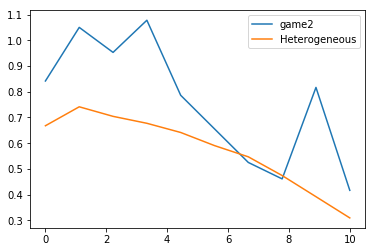

In [80]:
# Mean contribution per round
mean_contr_game2 = game2_contr.describe().loc['mean',:]
mean_contr_ineq= ineq_contr_dau_norm.mean(axis=0)*10

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_game2,label="game2")
ax.plot(x, mean_contr_ineq,label="Heterogeneous")

plt.legend()

### Socio-demographic exploration: 

In [49]:
### PCA: 
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
#X = ds_2_dau.iloc[:,-15:].fillna(0)

X = contr_street_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

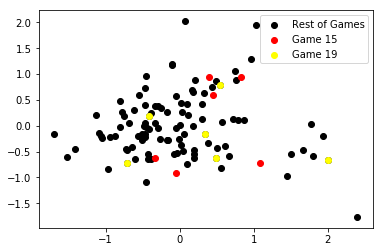

In [51]:
### Pintar jugadores por partida
X = contr_street_norm
y = ds_2_street.loc[:,"partida_id"]

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y!=15 ][0], transformed[y!=15 ][1], label='Rest of Games', c='black')
plt.scatter(transformed.loc[y==15][0], transformed.loc[y==15][1], label='Game 15', c='red')
plt.scatter(transformed.loc[y==19][0], transformed.loc[y==19][1], label='Game 19', c='yellow')
#plt.scatter(transformed[y!=15 or y!=19][0], transformed[y!=15 or y!=19][1], label='Rest of Games', c='black')

plt.legend()
plt.show()

In [23]:
clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

#user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user.csv", delimiter=',' , encoding="latin-1")
#user_street.drop(user_street.index[3], inplace=True)
din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']



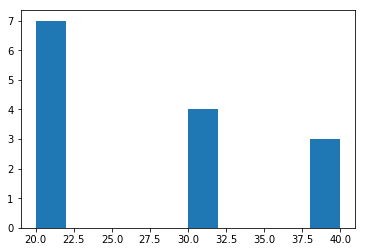

In [24]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [ ]:
din_in_clust1 = ds_2_street[user_street['user_id'].isin(users_clust1)]['genere']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']

In [52]:
ds_2_street.columns

Index(['user_id', 'partida_id', 'mean_contr', 'genere', 'rang_edat',
       'prfinal1', 'prfinal2', 'prfinal3', 'prfinal4', 'prfinal5', 'prfinal6',
       'prfinal7', 'prfinal8', 'prfinal9', 'prfinal10', 'prfinal11',
       'prfinal12', 'prfinal13', 'prfinal14', 'prfinal15'],
      dtype='object')

In [59]:
X_2_street = ds_2_street.iloc[:,-19:]

In [63]:
X_2_street= X_2_street.reindex(ds_2_street.iloc[:,0])

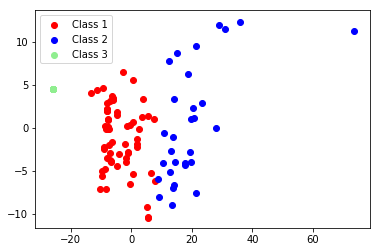

In [65]:
### PCA: 
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
#X = ds_2_dau.iloc[:,-15:].fillna(0)

X = X_2_street.fillna(0)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [65]:
user_street.head(10)

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
0,1,Test5,9000,d,56,r1,NaN,r1,r4,r3,...,False,False,1,0,3,r1,r4,8,10,0
1,2,Test2,12345,d,16,r2,NaN,r1,r3,r4,...,True,False,1,0,6,r3,r1,30,10,0
2,3,Test1,12345,h,12,r1,NaN,r1,r3,r1,...,True,False,1,0,4,r4,r3,32,10,1
3,4,Test3,12345,h,14,r1,NaN,r1,r1,r1,...,True,False,1,0,1,r3,r4,0,10,0
4,5,Test4,9000,h,55,r1,NaN,r1,r1,r1,...,True,False,1,0,5,r4,r3,28,10,0
5,6,Test6,12345,h,23,r2,NaN,r1,r1,r1,...,True,False,1,0,2,r2,r3,20,9,0
6,7,Aure,8025,d,26,r6,NaN,r1,r2,r2,...,False,False,2,0,2,r2,r2,26,10,1
7,8,MercÃ¨,8022,d,41,r6,NaN,r1,r2,r2,...,False,False,2,0,6,r1,r1,14,10,0
8,9,Coia,8016,h,57,r6,NaN,r1,r2,r2,...,False,False,2,0,1,r1,r3,2,10,0
9,10,Miranfu,8008,d,47,r6,NaN,r1,r2,r1,...,False,False,2,0,3,r3,r1,22,10,0


In [75]:
contr_street[contr_street.index.isin(user_street[user_street['genere']=='d']['user_id'])].sum(axis=1).describe()

count    44.000000
mean     20.590909
std       6.347745
min       2.000000
25%      17.500000
50%      22.000000
75%      24.000000
max      32.000000
dtype: float64

In [73]:
contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='d']['user_id'])].sum(axis=1).describe()

count    44.000000
mean      5.677273
std       2.196389
min       0.500000
25%       4.000000
50%       5.416667
75%       7.375000
max      10.000000
dtype: float64

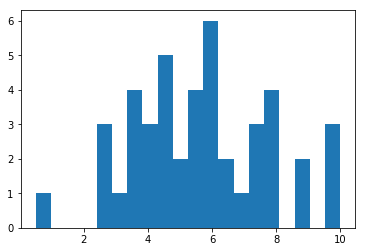

In [71]:
plt.hist(contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='d']['user_id'])].sum(axis=1), bins=20)
plt.show()

In [76]:
contr_street[contr_street.index.isin(user_street[user_street['genere']=='h']['user_id'])].sum(axis=1).describe()

count    64.000000
mean     21.578125
std       8.594581
min       2.000000
25%      16.000000
50%      22.000000
75%      28.000000
max      40.000000
dtype: float64

In [74]:
contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='h']['user_id'])].sum(axis=1).describe()

count    64.000000
mean      5.632292
std       2.329339
min       0.666667
25%       4.000000
50%       5.200000
75%       7.000000
max      10.000000
dtype: float64

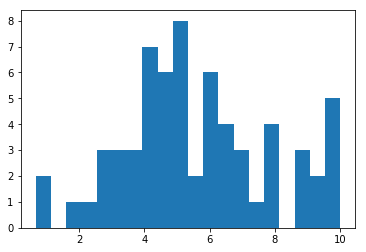

In [72]:
plt.hist(contr_street_norm[contr_street_norm.index.isin(user_street[user_street['genere']=='h']['user_id'])].sum(axis=1), bins=20)
plt.show()